In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
# Function to find common wavelength range and flux for two spectra
def find_common_range(wavelength1, flux1, wavelength2, flux2):
    common_range = np.intersect1d(wavelength1, wavelength2)
    indices1 = np.searchsorted(wavelength1, common_range, side='left')
    indices2 = np.searchsorted(wavelength2, common_range, side='left')
    indices1 = np.clip(indices1, 0, len(flux1) - 1)
    indices2 = np.clip(indices2, 0, len(flux2) - 1)
    common_flux1 = flux1[indices1]
    common_flux2 = flux2[indices2]
    return common_range, common_flux1, common_flux2


In [3]:
# Load Transiting Spectrum
transit_file = "t_K2-175_med-58119-kp2_04_201_sp15-087.fits"
data_transit = fits.open(transit_file)

# Red arm spectra
transit_wvr = data_transit[2].data["WAVELENGTH"]
transit_red = data_transit[2].data["FLUX"]

# Blue arm spectra
transit_wvb = data_transit[1].data["WAVELENGTH"]
transit_blue = data_transit[1].data["FLUX"]



In [4]:
# Load Non-Transit Spectrum
non_transit_file = "n_K2-175_med-58150-kp2_04_201_sp15-087.fits"
data_non_transit = fits.open(non_transit_file)

# Red arm spectrum
non_transit_red = data_non_transit[2].data["FLUX"]
non_transit_wvr = data_transit[2].data["WAVELENGTH"]

# Blue arm spectrum
non_transit_blue = data_non_transit[1].data["FLUX"]
non_transit_wvb = data_transit[1].data["WAVELENGTH"]


In [5]:
# Find common wavelength range for red and blue arms
common_range_red, transit_red_common, non_transit_red_common = find_common_range(transit_wvr[0], transit_red[0], non_transit_wvr[0], non_transit_red[0])
common_range_blue, transit_blue_common, non_transit_blue_common = find_common_range(transit_wvb[0], transit_blue[0], non_transit_wvb[0], non_transit_blue[0])

# Calculate median flux for each arm
median_flux_red = np.median(transit_red_common)
median_flux_blue = np.median(transit_blue_common)

# Normalize spectra between 0 and 1
normalized_red = (transit_red_common -  np.min(transit_red_common)) / (np.max(transit_red_common) - np.min(transit_red_common))
normalized_blue = (transit_blue_common - np.min(transit_blue_common)) / (np.max(transit_blue_common) - np.min(transit_blue_common))


normalized_non_transit_red = (non_transit_red_common  - np.min(non_transit_red_common)) / (np.max(non_transit_red_common) - np.min(non_transit_red_common))
normalized_non_transit_blue = (non_transit_blue_common  - np.min(non_transit_blue_common)) / (np.max(non_transit_blue_common) - np.min(non_transit_blue_common))


# Subtract normalized non-transit spectrum from normalized transiting spectrum
subtracted_red = normalized_red - normalized_non_transit_red
subtracted_blue = normalized_blue - normalized_non_transit_blue



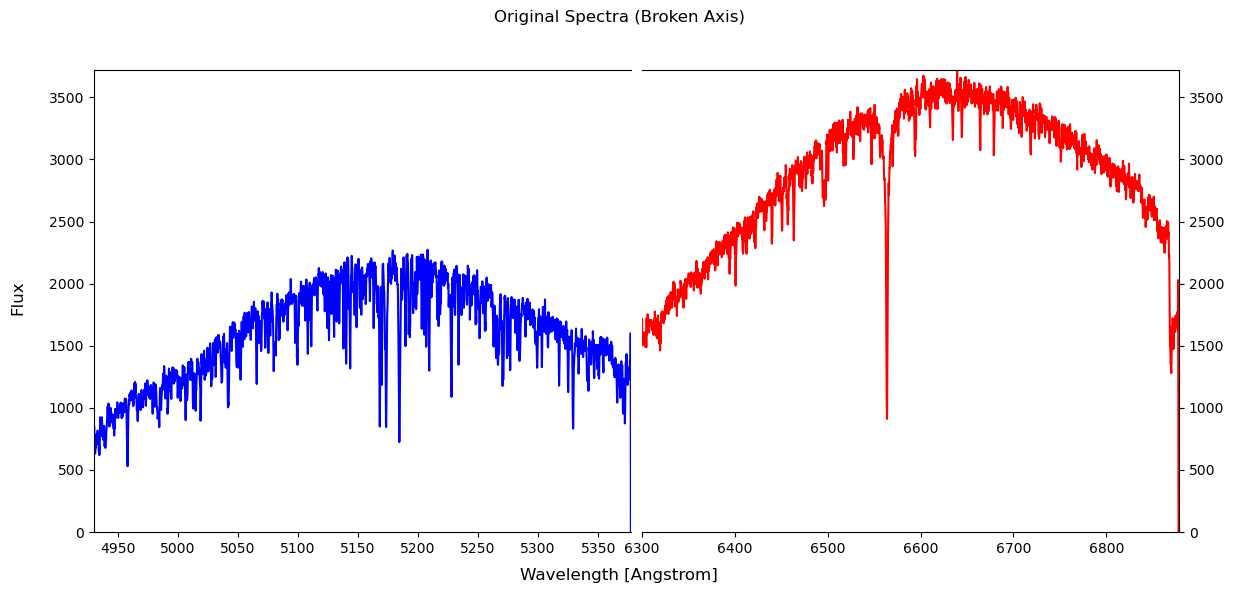

In [6]:
# Create a broken axis plot for original spectra
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# Plot the original spectra on both axes with a gap in the broken axis
ax.plot(common_range_blue, transit_blue_common, label='Common Blue Arm (Transit)', color='blue')
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot(common_range_red, transit_red_common, label='Common Red Arm (Transit)', color='red')

# Set x-axis limits
ax.set_xlim(np.min(common_range_blue), np.max(common_range_blue))
ax2.set_xlim(np.min(common_range_red), np.max(common_range_red))

# Set y-axis limits based on the range of original flux values
min_flux_original = min(np.min(transit_blue_common), np.min(transit_red_common))
max_flux_original = max(np.max(transit_blue_common), np.max(transit_red_common))
ax.set_ylim(min_flux_original, max_flux_original)
ax2.set_ylim(min_flux_original, max_flux_original)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Flux', va='center', rotation='vertical', size=12)
f.suptitle('Original Spectra (Broken Axis)')
plt.show()



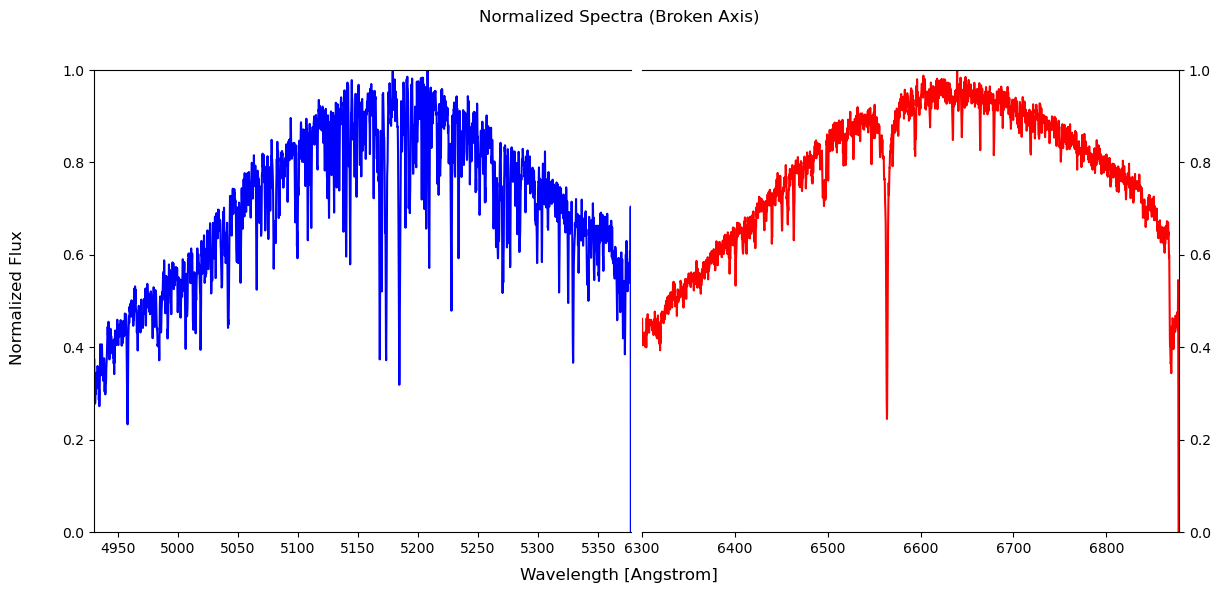

In [7]:
# Create a broken axis plot for normalized spectra
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# Plot the normalized spectra on both axes with a gap in the broken axis
ax.plot(common_range_blue, normalized_blue, label='Normalized Blue Arm (Transit)', color='blue')
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot(common_range_red, normalized_red, label='Normalized Red Arm (Transit)', color='red')

# Set x-axis limits
ax.set_xlim(np.min(common_range_blue), np.max(common_range_blue))
ax2.set_xlim(np.min(common_range_red), np.max(common_range_red))

# Set y-axis limits based on the range of normalized flux values
min_flux_norm = min(np.min(normalized_blue), np.min(normalized_red))
max_flux_norm = max(np.max(normalized_blue), np.max(normalized_red))
ax.set_ylim(min_flux_norm, max_flux_norm)
ax2.set_ylim(min_flux_norm, max_flux_norm)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
f.suptitle('Normalized Spectra (Broken Axis)')
plt.show()


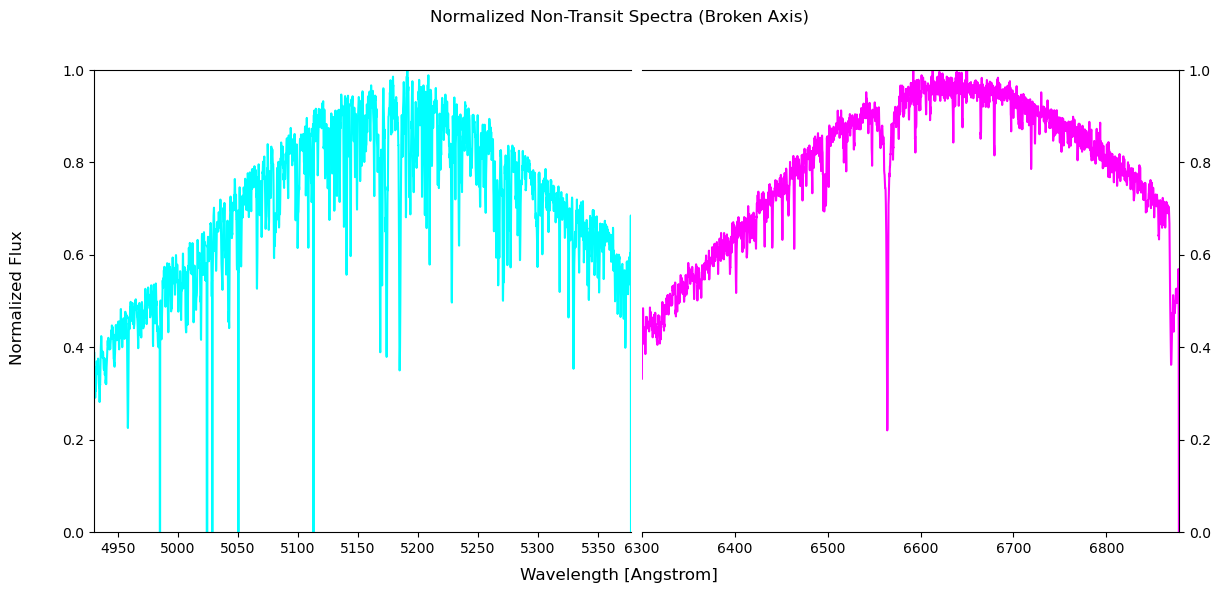

In [8]:
# Create a broken axis plot for normalized non-transit spectra
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# Plot the normalized non-transit spectra on both axes with a gap in the broken axis
ax.plot(common_range_blue, normalized_non_transit_blue, label='Normalized Blue Arm (Non-Transit)', color='cyan')
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot(common_range_red, normalized_non_transit_red, label='Normalized Red Arm (Non-Transit)', color='magenta')

# Set x-axis limits
ax.set_xlim(np.min(common_range_blue), np.max(common_range_blue))
ax2.set_xlim(np.min(common_range_red), np.max(common_range_red))

# Set y-axis limits based on the range of normalized flux values
min_flux_norm_non_transit = min(np.min(normalized_non_transit_blue), np.min(normalized_non_transit_red))
max_flux_norm_non_transit = max(np.max(normalized_non_transit_blue), np.max(normalized_non_transit_red))
ax.set_ylim(min_flux_norm_non_transit, max_flux_norm_non_transit)
ax2.set_ylim(min_flux_norm_non_transit, max_flux_norm_non_transit)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
f.suptitle('Normalized Non-Transit Spectra (Broken Axis)')
plt.show()


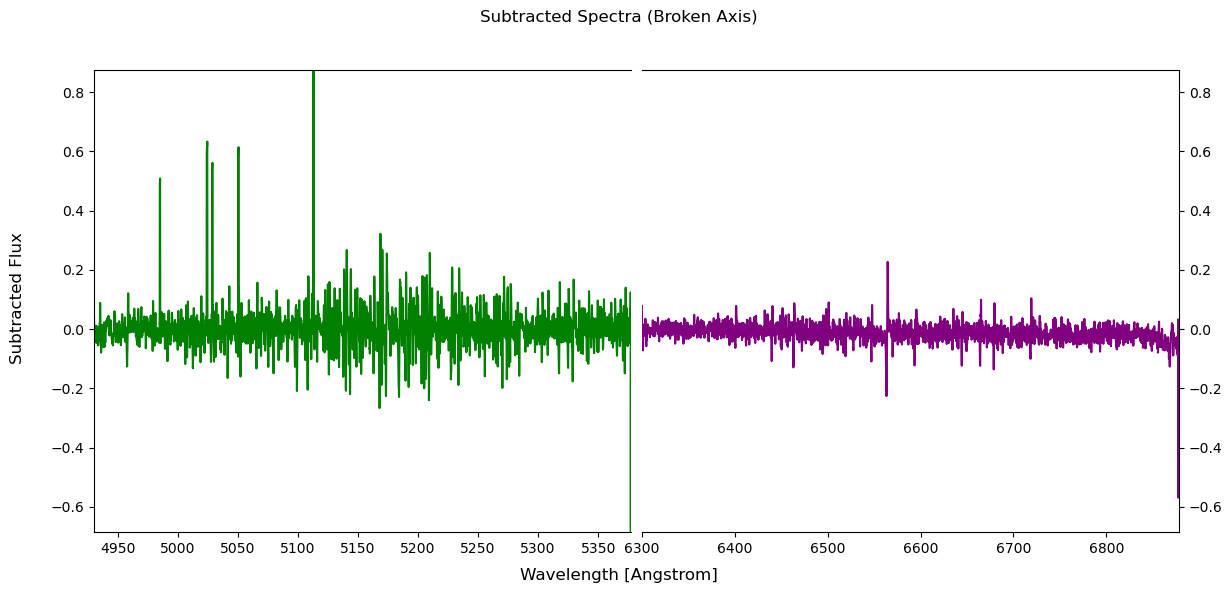

In [9]:
# Create a broken axis plot for subtracted spectra
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(14, 6))
f.subplots_adjust(wspace=0.020)

# Plot the subtracted spectra on both axes with a gap in the broken axis
ax.plot(common_range_blue, subtracted_blue, label='Subtracted Blue Arm', color='green')
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)
ax2.plot(common_range_red, subtracted_red, label='Subtracted Red Arm', color='purple')

# Set x-axis limits
ax.set_xlim(np.min(common_range_blue), np.max(common_range_blue))
ax2.set_xlim(np.min(common_range_red), np.max(common_range_red))

# Set y-axis limits based on the range of subtracted flux values
min_flux_subtracted = min(np.min(subtracted_blue), np.min(subtracted_red))
max_flux_subtracted = max(np.max(subtracted_blue), np.max(subtracted_red))
ax.set_ylim(min_flux_subtracted, max_flux_subtracted)
ax2.set_ylim(min_flux_subtracted, max_flux_subtracted)

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout
f.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
f.text(0.065, 0.5, 'Subtracted Flux', va='center', rotation='vertical', size=12)
f.suptitle('Subtracted Spectra (Broken Axis)')
plt.show()


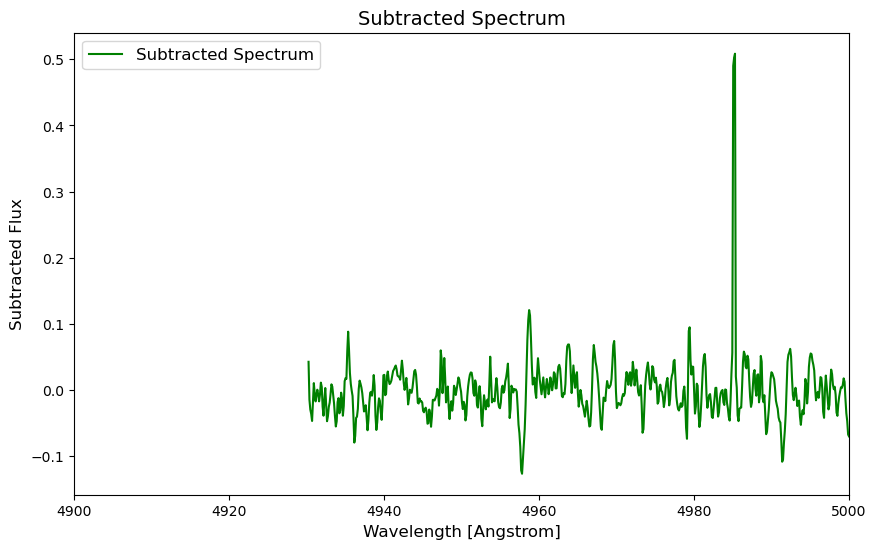

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_subtract_spectrum(wavelength_range, subtracted_wavelength, subtracted_flux):
    # Assuming you have defined subtracted_red, subtracted_blue, common_range_red, common_range_blue, and other variables...

    # Select the data within the wavelength range
    mask = (subtracted_wavelength >= wavelength_range[0]) & (subtracted_wavelength <= wavelength_range[1])

    # Check if there is any data in the wavelength range
    if not np.any(mask):
        print("No data in the specified wavelength range.")
        return

    # Create a new figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the subtracted spectrum within the wavelength range
    ax.plot(subtracted_wavelength[mask], subtracted_flux[mask], label='Subtracted Spectrum', color='green')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('Subtracted Flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Subtracted Spectrum', fontsize=14)

    plt.show()

# Call the function with the desired wavelength range
# Assuming you have defined subtracted_blue, common_range_blue, subtracted_red, common_range_red, and other variables...
# Adjust the variables accordingly based on your actual variable names.
plot_subtract_spectrum([4900, 5000], common_range_blue, subtracted_blue)



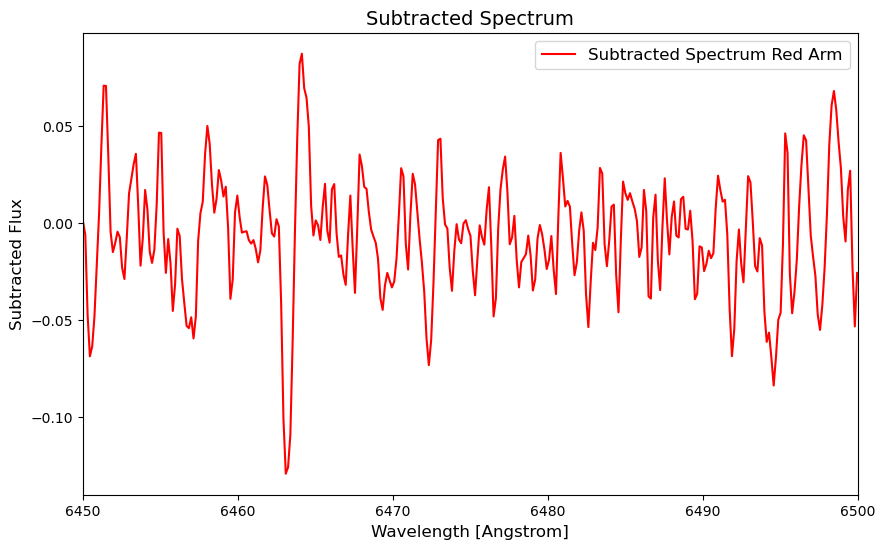

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrum(wavelength_range):
    # Assuming you have defined normalized_red, normalized_blue, wvr, wvb, and other variables as in your code...

    # Select the data within the wavelength range
    mask_blue = (common_range_blue >= wavelength_range[0]) & (common_range_blue <= wavelength_range[1])
    mask_red = (common_range_red >= wavelength_range[0]) & (common_range_red <= wavelength_range[1])

    # Check if there is any data in the wavelength range for each spectrum
    if not np.any(mask_blue) and not np.any(mask_red):
        print("No data in the specified wavelength range.")
        return

    # Create a new figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the spectra that fall within the wavelength range
    if np.any(mask_blue):
        ax.plot(common_range_blue[mask_blue], subtracted_blue[mask_blue], label='Subtracted Spectrum Blue Arm', color='blue')
    if np.any(mask_red):
        ax.plot(common_range_red[mask_red], subtracted_red[mask_red], label='Subtracted Spectrum Red Arm', color='red')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('Subtracted Flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Subtracted Spectrum', fontsize=14)

    plt.show()

# Call the function with the desired wavelength range
plot_spectrum([6450, 6500])


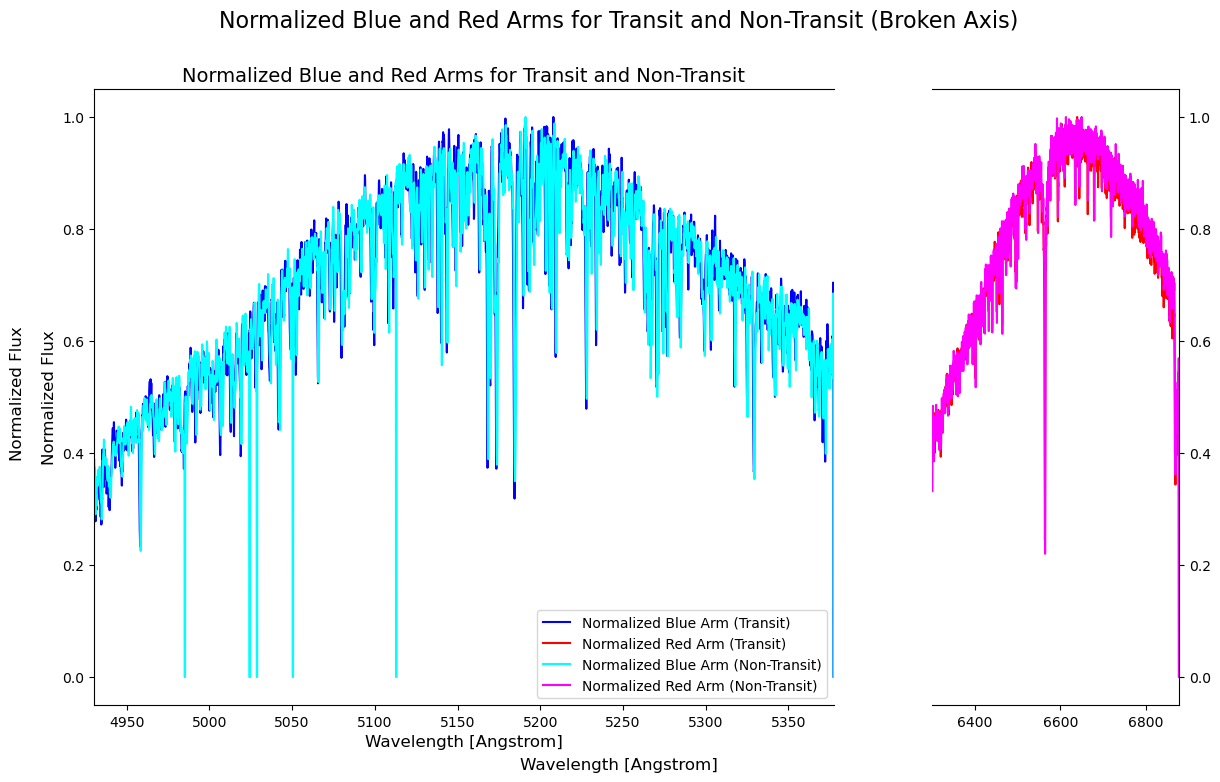

In [12]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Create a broken axis plot for normalized blue and red arms
fig = plt.figure(figsize=(14, 8))

# Define the gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# Create the left subplot (main plot)
ax = plt.subplot(gs[0])
ax.plot(common_range_blue, normalized_blue, label='Normalized Blue Arm (Transit)', color='blue')
ax.plot(common_range_red, normalized_red, label='Normalized Red Arm (Transit)', color='red')
ax.plot([np.nan, np.nan], [np.nan, np.nan], color='k', linestyle='-', linewidth=1)  # Broken axis line

# Plot non-transit spectra as well
ax.plot(common_range_blue, normalized_non_transit_blue, label='Normalized Blue Arm (Non-Transit)', color='cyan')
ax.plot(common_range_red, normalized_non_transit_red, label='Normalized Red Arm (Non-Transit)', color='magenta')

# Set x-axis limits
ax.set_xlim(np.min(common_range_blue), np.max(common_range_blue))

# Adjust the figure layout
ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
ax.set_ylabel('Normalized Flux', fontsize=12)
ax.legend(fontsize=10)
ax.set_title('Normalized Blue and Red Arms for Transit and Non-Transit', fontsize=14)

# Create the right subplot (broken axis)
ax2 = plt.subplot(gs[1])
ax2.plot(common_range_blue, normalized_blue, label='Normalized Blue Arm (Transit)', color='blue')
ax2.plot(common_range_red, normalized_red, label='Normalized Red Arm (Transit)', color='red')

# Plot non-transit spectra as well
ax2.plot(common_range_blue, normalized_non_transit_blue, label='Normalized Blue Arm (Non-Transit)', color='cyan')
ax2.plot(common_range_red, normalized_non_transit_red, label='Normalized Red Arm (Non-Transit)', color='magenta')

# Set x-axis limits for the broken axis
ax2.set_xlim(np.min(common_range_red), np.max(common_range_red))

# Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

# Adjust the figure layout for the broken axis
fig.text(0.5, 0.03, 'Wavelength [Angstrom]', ha='center', size=12)
fig.text(0.065, 0.5, 'Normalized Flux', va='center', rotation='vertical', size=12)
fig.suptitle('Normalized Blue and Red Arms for Transit and Non-Transit (Broken Axis)', fontsize=16)

plt.show()



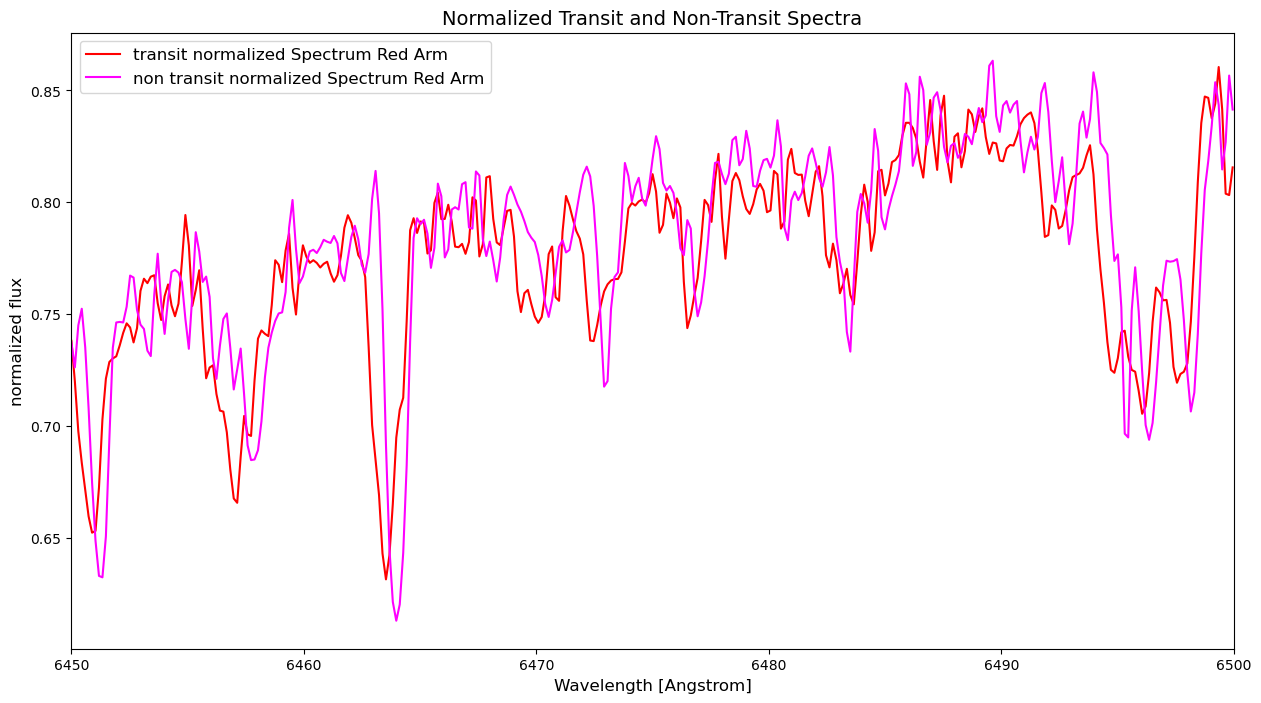

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spectrum(wavelength_range):
    # Assuming you have defined normalized_red, normalized_blue, wvr, wvb, and other variables as in your code...

    # Select the data within the wavelength range
    mask_blue = (common_range_blue >= wavelength_range[0]) & (common_range_blue <= wavelength_range[1])
    mask_red = (common_range_red >= wavelength_range[0]) & (common_range_red <= wavelength_range[1])

    # Check if there is any data in the wavelength range for each spectrum
    if not np.any(mask_blue) and not np.any(mask_red):
        print("No data in the specified wavelength range.")
        return

    # Create a new figure
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the spectra that fall within the wavelength range
    if np.any(mask_blue):
        ax.plot(common_range_blue[mask_blue], normalized_blue[mask_blue], label='transit normalized Spectrum Blue Arm', color='blue')
        ax.plot(common_range_blue[mask_blue], normalized_non_transit_blue[mask_blue], label='non transit normalized Spectrum Blue Arm', color='cyan')
    if np.any(mask_red):
        ax.plot(common_range_red[mask_red], normalized_red[mask_red], label='transit normalized Spectrum Red Arm', color='red')
        ax.plot(common_range_red[mask_red], normalized_non_transit_red[mask_red], label='non transit normalized Spectrum Red Arm', color='magenta')
        
    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('normalized flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Normalized Transit and Non-Transit Spectra', fontsize=14)

    plt.show()

# Call the function with the desired wavelength range
plot_spectrum([6450, 6500])





In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

def plot_spectrum_with_crosscor(normalized_blue, normalized_red, normalized_non_transit_blue, normalized_non_transit_red, common_range_blue, common_range_red, wavelength_range):
    # Select the data within the wavelength range for both transit and non-transit
    mask_blue = (common_range_blue >= wavelength_range[0]) & (common_range_blue <= wavelength_range[1])
    mask_red = (common_range_red >= wavelength_range[0]) & (common_range_red <= wavelength_range[1])

    # Check if there is any data in the specified wavelength range for each arm
    has_data_blue = np.any(mask_blue)
    has_data_red = np.any(mask_red)
    
    # Increase the figure size
    fig, ax = plt.subplots(figsize=(15, 8))    
    
    
    # Plot only if there's data in the specified wavelength range
    if has_data_blue or has_data_red:
        if has_data_blue and has_data_red:
            # If both blue and red arms are available, plot both for transit and non-transit
            plt.plot(common_range_blue[mask_blue], normalized_blue[mask_blue], label='Transit Blue Arm', color='blue')
            plt.plot(common_range_blue[mask_blue], normalized_non_transit_blue[mask_blue], label='Non-Transit Blue Arm', color='cyan')
            plt.plot(common_range_red[mask_red], normalized_red[mask_red], label='Transit Red Arm', color='red')
            plt.plot(common_range_red[mask_red], normalized_non_transit_red[mask_red], label='Non-Transit Red Arm', color='magenta')

            # Calculate cross-correlation for both arms
            cross_corr_blue = correlate(normalized_blue[mask_blue], normalized_non_transit_blue[mask_blue], mode='full')
            cross_corr_red = correlate(normalized_red[mask_red], normalized_non_transit_red[mask_red], mode='full')

            # Find lag that maximizes cross-correlation
            lag_blue = np.argmax(cross_corr_blue) - len(normalized_non_transit_blue[mask_blue]) + 1
            lag_red = np.argmax(cross_corr_red) - len(normalized_non_transit_red[mask_red]) + 1

            # Apply lag to non-transit spectrum
            if lag_blue > 0:
                normalized_non_transit_blue[mask_blue] = normalized_non_transit_blue[mask_blue, lag_blue:]
            elif lag_blue < 0:
                normalized_non_transit_blue[mask_blue] = np.pad(normalized_non_transit_blue[mask_blue], (-lag_blue, 0), 'constant')

            if lag_red > 0:
                normalized_non_transit_red[mask_red] = normalized_non_transit_red[mask_red, lag_red:]
            elif lag_red < 0:
                normalized_non_transit_red[mask_red] = np.pad(normalized_non_transit_red[mask_red], (-lag_red, 0), 'constant')

        elif has_data_blue:
            # If only blue arm is available, plot it for both transit and non-transit
            plt.plot(common_range_blue[mask_blue], normalized_blue[mask_blue], label='Transit Blue Arm', color='blue')
            plt.plot(common_range_blue[mask_blue], normalized_non_transit_blue[mask_blue], label='Non-Transit Blue Arm', color='cyan')

            # Calculate cross-correlation for the blue arm
            cross_corr_blue = correlate(normalized_blue[mask_blue], normalized_non_transit_blue[mask_blue], mode='full')

            # Find lag that maximizes cross-correlation
            lag_blue = np.argmax(cross_corr_blue) - len(normalized_non_transit_blue[mask_blue]) + 1

            # Apply lag to non-transit spectrum
            if lag_blue > 0:
                normalized_non_transit_blue[mask_blue] = normalized_non_transit_blue[mask_blue, lag_blue:]
            elif lag_blue < 0:
                normalized_non_transit_blue[mask_blue] = np.pad(normalized_non_transit_blue[mask_blue], (-lag_blue, 0), 'constant')

        elif has_data_red:
            # If only red arm is available, plot it for both transit and non-transit
            plt.plot(common_range_red[mask_red], normalized_red[mask_red], label='Transit Red Arm', color='red')
            plt.plot(common_range_red[mask_red], normalized_non_transit_red[mask_red], label='Non-Transit Red Arm', color='magenta')

            # Calculate cross-correlation for the red arm
            cross_corr_red = correlate(normalized_red[mask_red], normalized_non_transit_red[mask_red], mode='full')

            # Find lag that maximizes cross-correlation
            lag_red = np.argmax(cross_corr_red) - len(normalized_non_transit_red[mask_red]) + 1

            # Apply lag to non-transit spectrum
            if lag_red > 0:
                normalized_non_transit_red[mask_red] = normalized_non_transit_red[mask_red, lag_red:]
            elif lag_red < 0:
                normalized_non_transit_red[mask_red] = np.pad(normalized_non_transit_red[mask_red], (-lag_red, 0), 'constant')

        # Set x-axis limits
        plt.xlim(wavelength_range[0], wavelength_range[1])

        # Adjust the figure layout
        plt.xlabel('Wavelength [Angstrom]', fontsize=10)
        plt.ylabel('Normalized Flux', fontsize=10)
        plt.legend(fontsize=12)
        plt.title('Normalized Spectra with Cross-Correlation', fontsize=10)

        plt.show()
    else:
        # Print a message if there's no data in the specified wavelength range for either Blue or Red Arm
        print("No data in the specified wavelength range for either Blue or Red Arm.")

        # Example usage with a specific wavelength range
    

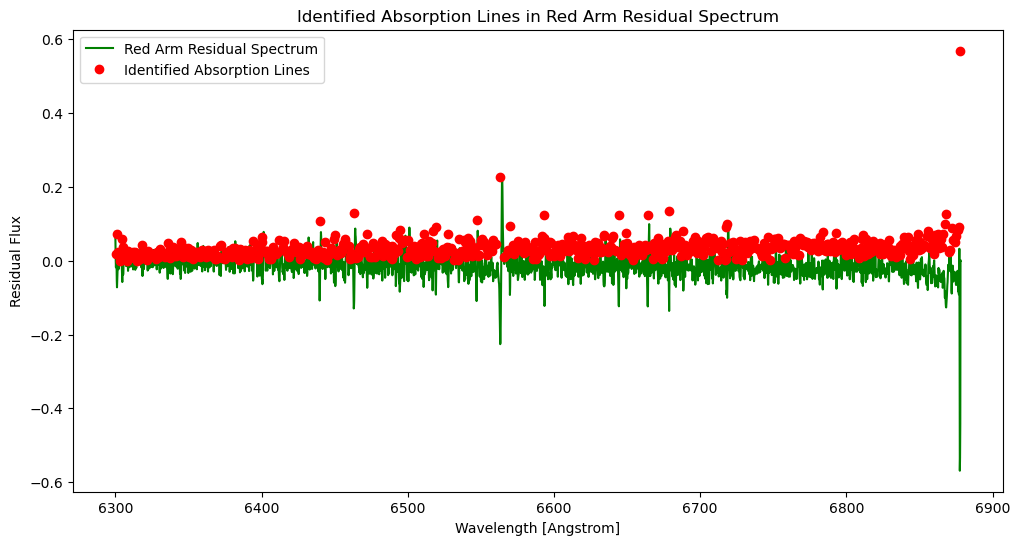

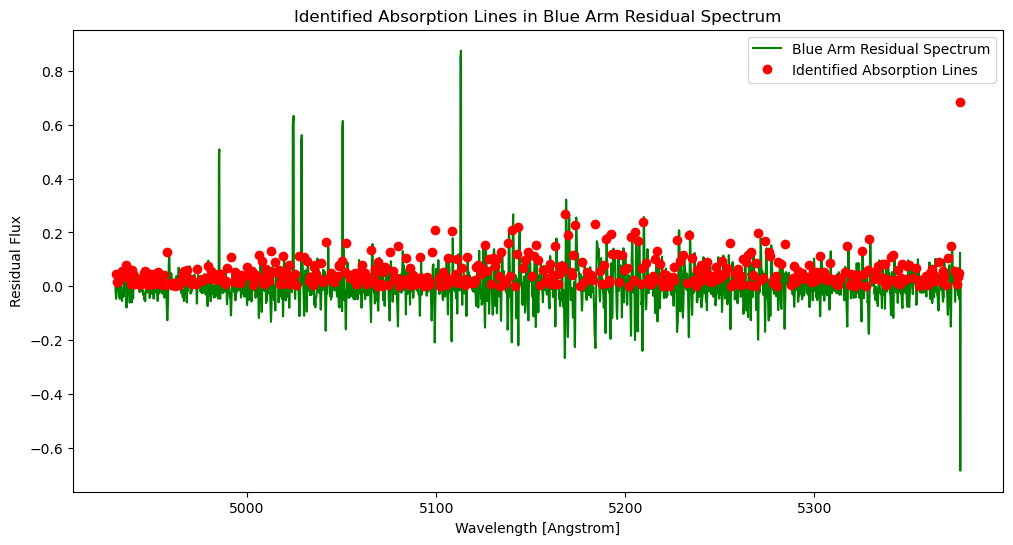

Identified Absorption Lines Wavelengths (Red Arm): [6300.4277 6301.1543 6302.168  6302.8945 6303.3306 6304.781  6305.3623
 6306.8125 6307.3945 6308.1216 6308.7036 6309.2817 6310.0093 6310.5913
 6311.319  6312.1885 6313.2075 6313.644  6314.3687 6314.805  6315.242
 6316.9863 6317.8604 6318.5884 6319.026  6319.605  6320.042  6321.354
 6322.079  6322.662  6323.2456 6324.554  6324.9917 6325.575  6326.596
 6326.8843 6327.614  6328.3433 6329.0728 6329.6533 6330.383  6331.259
 6332.4233 6333.0073 6334.03   6334.7563 6335.779  6337.0903 6337.675
 6339.282  6340.448  6341.179  6341.764  6342.638  6343.3696 6344.247
 6344.686  6346.1455 6347.17   6347.752  6349.5083 6349.944  6350.53
 6351.115  6351.5547 6352.5767 6353.309  6354.188  6355.21   6355.7964
 6356.9688 6357.8447 6358.2847 6359.4575 6360.774  6361.3604 6362.2407
 6362.9707 6363.4106 6364.438  6365.025  6365.462  6367.37   6368.394
 6368.688  6369.2754 6369.716  6370.303  6371.328  6372.2095 6373.235
 6374.1167 6374.7046 6375.73   6376.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def identify_absorption_lines(transit_spectrum, non_transit_spectrum, common_wavelength_range, arm_label):
    # Calculate the residual spectrum (transit - non-transit)
    residual_spectrum = transit_spectrum - non_transit_spectrum

    # Find peaks in the negative of the residual spectrum
    peaks, _ = find_peaks(-residual_spectrum, height=0.000001)  # Adjust the height threshold as needed

    # Extract wavelength values corresponding to the peaks
    absorption_line_wavelengths = common_wavelength_range[peaks]

    # Plot the residual spectrum with identified absorption lines
    plt.figure(figsize=(12, 6))
    plt.plot(common_wavelength_range, residual_spectrum, label=f'{arm_label} Residual Spectrum', color='green')
    plt.plot(absorption_line_wavelengths, -residual_spectrum[peaks], 'ro', label='Identified Absorption Lines')
    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Residual Flux')
    plt.title(f'Identified Absorption Lines in {arm_label} Residual Spectrum')
    plt.legend()
    plt.show()

    # Return the identified absorption line wavelengths
    return absorption_line_wavelengths

# Example usage
# Assuming you have transit_spectrum, non_transit_spectrum, and common_wavelength_range defined for both red and blue arms

# Identify absorption lines in the red arm residual spectrum
identified_absorption_lines_red = identify_absorption_lines(normalized_red, normalized_non_transit_red, common_range_red, 'Red Arm')

# Identify absorption lines in the blue arm residual spectrum
identified_absorption_lines_blue = identify_absorption_lines(normalized_blue, normalized_non_transit_blue, common_range_blue, 'Blue Arm')

# Print the identified absorption line wavelengths for each arm
print("Identified Absorption Lines Wavelengths (Red Arm):", identified_absorption_lines_red)
print("Identified Absorption Lines Wavelengths (Blue Arm):", identified_absorption_lines_blue)



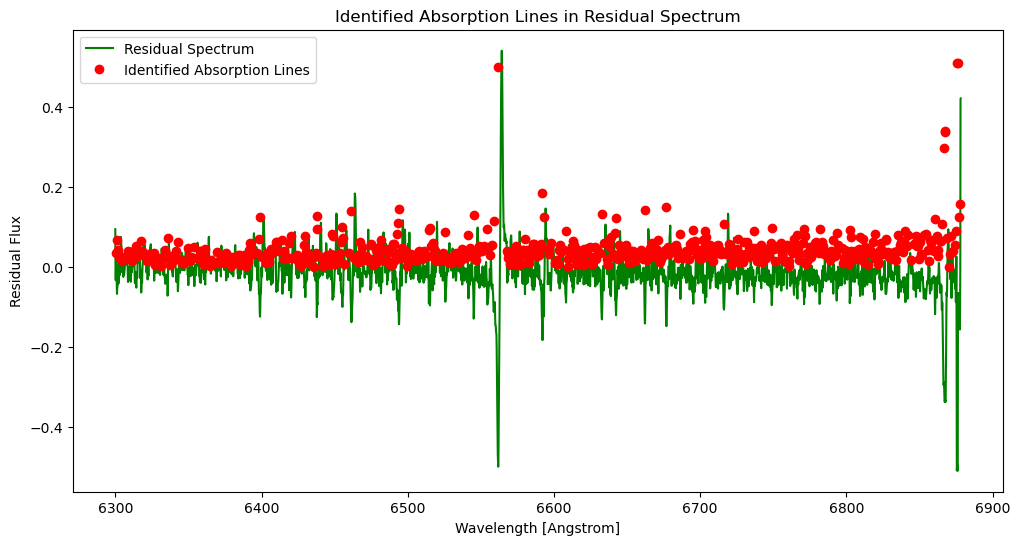

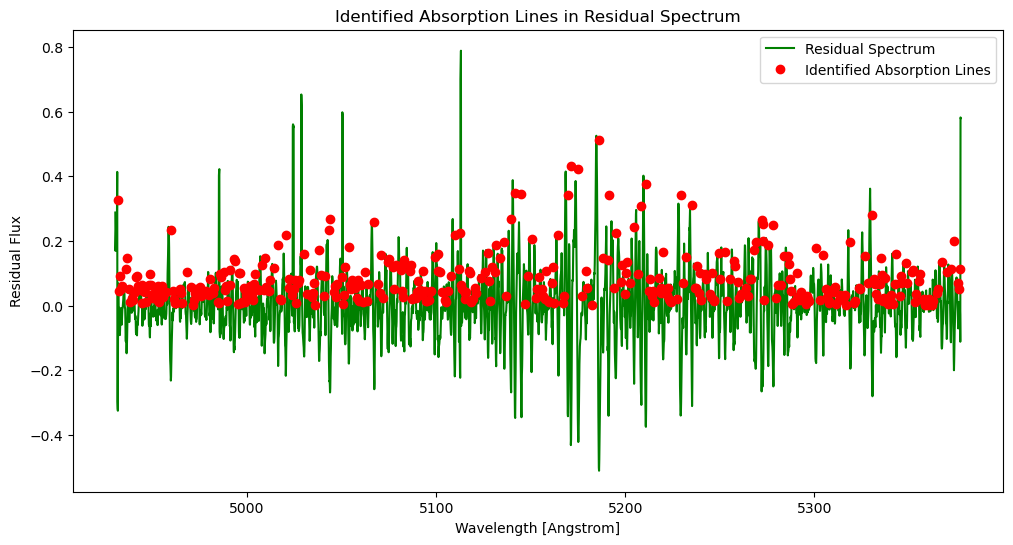

Identified Absorption Lines Wavelengths (Red Arm): [6300.2827 6301.1543 6302.168  6302.8945 6304.6353 6305.5073 6305.944
 6308.7036 6309.136  6310.5913 6311.1733 6313.4985 6314.3687 6314.9507
 6317.132  6317.7144 6318.2974 6321.354  6322.079  6322.662  6326.596
 6327.1763 6327.614  6328.3433 6329.3613 6330.675  6331.259  6332.8613
 6334.176  6334.6104 6335.1943 6335.779  6337.529  6338.8438 6339.282
 6341.764  6342.3457 6342.784  6344.247  6345.853  6347.0234 6347.3125
 6349.5083 6349.944  6350.6763 6350.969  6351.5547 6353.016  6354.0415
 6355.0635 6357.552  6357.991  6358.5776 6359.4575 6360.4805 6360.9204
 6361.5073 6362.0938 6364.438  6365.315  6368.394  6369.2754 6369.863
 6370.7407 6372.2095 6374.5576 6375.877  6376.465  6377.053  6377.641
 6378.0825 6378.814  6379.2554 6379.697  6380.5796 6384.104  6384.693
 6385.2817 6385.8706 6386.456  6388.5146 6389.104  6389.546  6390.2827
 6391.019  6391.605  6392.3423 6392.784  6393.374  6397.2007 6398.2334
 6398.9673 6400.2954 6403.0967 6

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate, find_peaks

# Function to correct wavelength shift using cross-correlation
def correct_wavelength_shift(transit_spectrum, reference_spectrum):
    # Calculate cross-correlation
    cross_corr = correlate(transit_spectrum, reference_spectrum, mode='full')

    # Find the lag that maximizes cross-correlation
    lag = np.argmax(cross_corr) - len(transit_spectrum) + 1

    # Correct the wavelength shift
    corrected_transit_spectrum = np.roll(transit_spectrum, lag)

    return corrected_transit_spectrum

# Function to identify absorption lines in the residual spectrum
def identify_absorption_lines(transit_spectrum, non_transit_spectrum, common_wavelength_range):
    # Make sure both spectra have the same length
    min_length = min(len(transit_spectrum), len(non_transit_spectrum))
    transit_spectrum = transit_spectrum[:min_length]
    non_transit_spectrum = non_transit_spectrum[:min_length]

    # Calculate the residual spectrum (transit - non-transit)
    residual_spectrum = transit_spectrum - non_transit_spectrum

    # Find peaks in the negative of the residual spectrum
    peaks, _ = find_peaks(-residual_spectrum, height=0.00001)  # Adjust the height threshold as needed

    # Extract wavelength values corresponding to the peaks
    absorption_line_wavelengths = common_wavelength_range[peaks]

    # Plot the residual spectrum with identified absorption lines
    plt.figure(figsize=(12, 6))
    plt.plot(common_wavelength_range, residual_spectrum, label='Residual Spectrum', color='green')
    plt.plot(absorption_line_wavelengths, -residual_spectrum[peaks], 'ro', label='Identified Absorption Lines')
    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Residual Flux')
    plt.title('Identified Absorption Lines in Residual Spectrum')
    plt.legend()
    plt.show()

    # Return the identified absorption line wavelengths
    return absorption_line_wavelengths

# Example usage
# Assuming you have normalized_red, normalized_non_transit_red, common_range_red,
# normalized_blue, normalized_non_transit_blue, and common_range_blue defined

# Correct the wavelength shift for the red arm using the blue arm as a reference
corrected_transit_spectrum_red = correct_wavelength_shift(normalized_red, normalized_blue)

# Identify absorption lines in the corrected residual spectrum for red arm
identified_absorption_lines_red = identify_absorption_lines(corrected_transit_spectrum_red, normalized_non_transit_red, common_range_red)

# Correct the wavelength shift for the blue arm using the red arm as a reference
corrected_transit_spectrum_blue = correct_wavelength_shift(normalized_blue, normalized_red)

# Identify absorption lines in the corrected residual spectrum for blue arm
identified_absorption_lines_blue = identify_absorption_lines(corrected_transit_spectrum_blue, normalized_non_transit_blue, common_range_blue)

# Print the identified absorption line wavelengths for red and blue arms
print("Identified Absorption Lines Wavelengths (Red Arm):", identified_absorption_lines_red)
print("Identified Absorption Lines Wavelengths (Blue Arm):", identified_absorption_lines_blue)


Absorption Lines in Transit Spectrum (Blue Arm): [5168.087  5169.7554 5173.4463]
Absorption Lines in Non-Transit Spectrum (Blue Arm): [5166.4214 5168.5635 5170.11   5173.8037]
Absorption Lines in Transit Spectrum (Red Arm): []
Absorption Lines in Non-Transit Spectrum (Red Arm): []


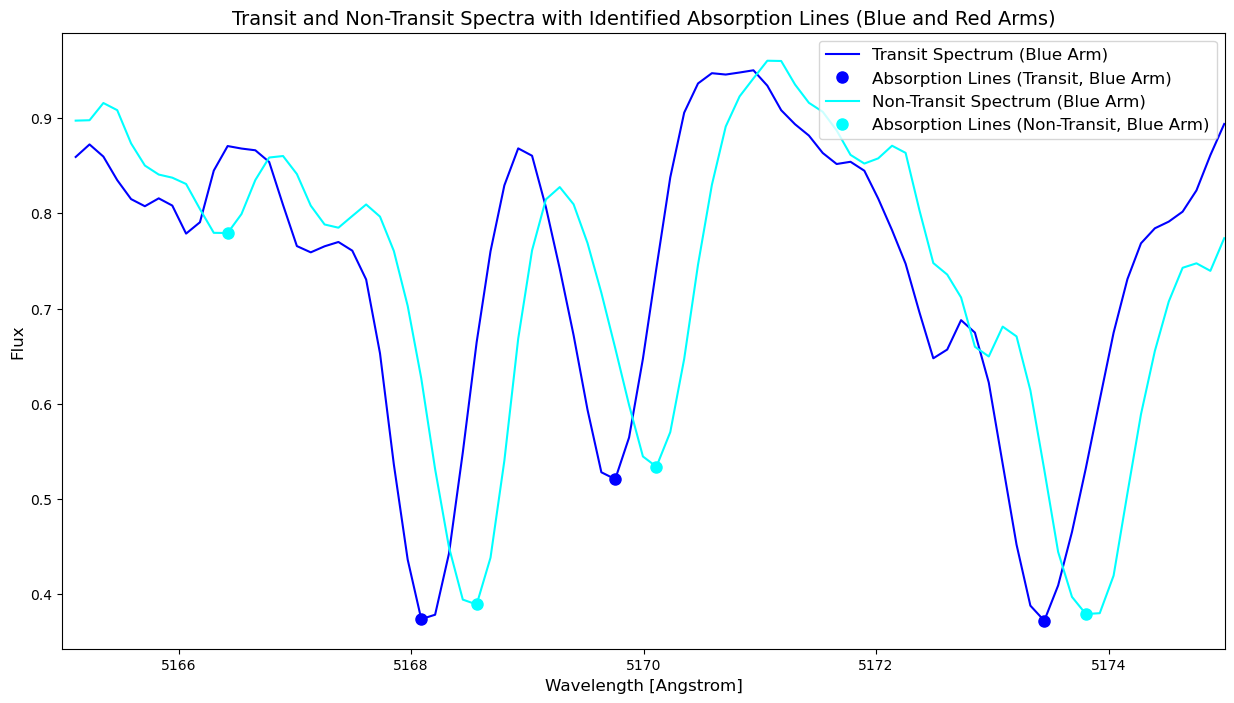

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

def find_and_plot_absorption_lines(transit_spectrum_blue, transit_spectrum_red, non_transit_spectrum_blue, non_transit_spectrum_red, common_range_blue, common_range_red, wavelength_range, sensitivity):
    # Select the data within the wavelength range
    mask_blue = (common_range_blue >= wavelength_range[0]) & (common_range_blue <= wavelength_range[1])
    mask_red = (common_range_red >= wavelength_range[0]) & (common_range_red <= wavelength_range[1])

    # Check if there is any data in the wavelength range for each spectrum
    if not np.any(mask_blue) and not np.any(mask_red):
        print("No data in the specified wavelength range.")
        return

    # Find local minima in the blue arm transit spectrum
    minima_transit_blue = argrelextrema(transit_spectrum_blue[mask_blue], np.less, order=10)[0]

    # Find local minima in the red arm transit spectrum
    minima_transit_red = argrelextrema(transit_spectrum_red[mask_red], np.less, order=10)[0]

    # Find local minima in the blue arm non-transit spectrum
    minima_non_transit_blue = argrelextrema(non_transit_spectrum_blue[mask_blue], np.less, order=10)[0]

    # Find local minima in the red arm non-transit spectrum
    minima_non_transit_red = argrelextrema(non_transit_spectrum_red[mask_red], np.less, order=10)[0]

    # Print the wavelength values corresponding to the identified absorption lines
    print("Absorption Lines in Transit Spectrum (Blue Arm):", common_range_blue[mask_blue][minima_transit_blue])
    print("Absorption Lines in Non-Transit Spectrum (Blue Arm):", common_range_blue[mask_blue][minima_non_transit_blue])

    print("Absorption Lines in Transit Spectrum (Red Arm):", common_range_red[mask_red][minima_transit_red])
    print("Absorption Lines in Non-Transit Spectrum (Red Arm):", common_range_red[mask_red][minima_non_transit_red])

    # Create a new figure
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot the spectra with identified absorption lines
    if np.any(mask_blue):
        ax.plot(common_range_blue[mask_blue], transit_spectrum_blue[mask_blue], label='Transit Spectrum (Blue Arm)', color='blue')
        ax.plot(common_range_blue[mask_blue][minima_transit_blue], transit_spectrum_blue[mask_blue][minima_transit_blue], 'o', color='blue', markersize=8, label='Absorption Lines (Transit, Blue Arm)')

        ax.plot(common_range_blue[mask_blue], non_transit_spectrum_blue[mask_blue], label='Non-Transit Spectrum (Blue Arm)', color='cyan')
        ax.plot(common_range_blue[mask_blue][minima_non_transit_blue], non_transit_spectrum_blue[mask_blue][minima_non_transit_blue], 'o', color='cyan', markersize=8, label='Absorption Lines (Non-Transit, Blue Arm)')

    if np.any(mask_red):
        ax.plot(common_range_red[mask_red], transit_spectrum_red[mask_red], label='Transit Spectrum (Red Arm)', color='red')
        ax.plot(common_range_red[mask_red][minima_transit_red], transit_spectrum_red[mask_red][minima_transit_red], 'o', color='red', markersize=8, label='Absorption Lines (Transit, Red Arm)')

        ax.plot(common_range_red[mask_red], non_transit_spectrum_red[mask_red], label='Non-Transit Spectrum (Red Arm)', color='magenta')
        ax.plot(common_range_red[mask_red][minima_non_transit_red], non_transit_spectrum_red[mask_red][minima_non_transit_red], 'o', color='magenta', markersize=8, label='Absorption Lines (Non-Transit, Red Arm)')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('Flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Transit and Non-Transit Spectra with Identified Absorption Lines (Blue and Red Arms)', fontsize=14)

    plt.show()

# Example usage (replace with your actual values)
# Assuming you have normalized_blue, normalized_red, normalized_non_transit_blue, normalized_non_transit_red,
# common_range_blue, common_range_red, and other variables defined
find_and_plot_absorption_lines(normalized_blue, normalized_red, normalized_non_transit_blue, normalized_non_transit_red, common_range_blue, common_range_red, [5165, 5175], sensitivity=0.01)


In [18]:
corrected_wavelength_blue_transit=[]
corrected_wavelength_blue_non_transit=[]

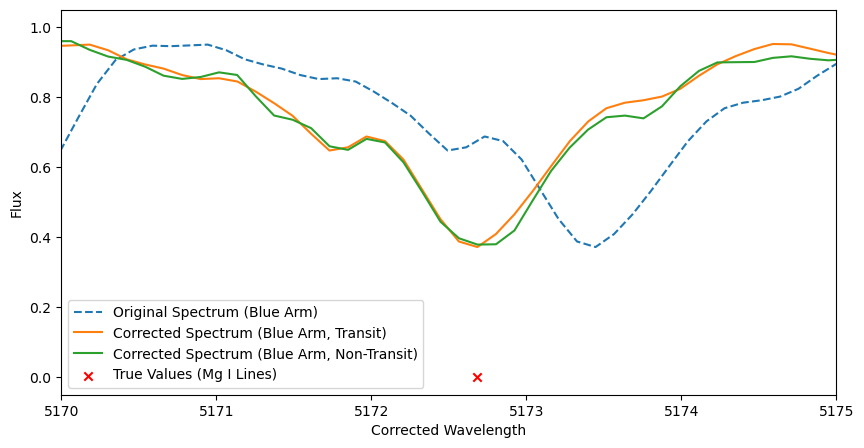

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def correct_wavelength_with_calibration(transit_spectrum, common_range, true_peak_wavelengths, observed_peak_wavelengths_transit, observed_peak_wavelengths_non_transit):
    # Calculate the correction factors based on the true and observed peaks for transit and non-transit
    correction_factor_transit = np.mean(true_peak_wavelengths - observed_peak_wavelengths_transit)
    correction_factor_non_transit = np.mean(true_peak_wavelengths - observed_peak_wavelengths_non_transit)

    # Correct the wavelength scale of the transit and non-transit spectra separately
    corrected_wavelength_transit = common_range + correction_factor_transit
    corrected_wavelength_non_transit = common_range + correction_factor_non_transit

    return corrected_wavelength_transit, corrected_wavelength_non_transit
''''
# Example true values for Mg I lines from a high-resolution reference spectrum
mg_i_lines_true_values = np.array([5172.684, 5183.604])

# Example observed values for Mg I lines in transit and non-transit spectra
observed_peaks_transit_blue = np.array([5173.4463, 5184.4175])  # Adjust with actual peak values
observed_peaks_non_transit_blue = np.array([5164.0454, 5174.878])  # Adjust with actual peak values

# Use the actual common range for the blue arm obtained from find_common_range
common_range_blue, _, _ = find_common_range(transit_wvb[0], transit_blue[0], transit_wvb[0], non_transit_blue[0])
'''
# Example true values for Mg I lines from a high-resolution reference spectrum
mg_i_lines_true_values = np.array([5172.684])

# Example observed values for Mg I lines in transit and non-transit spectra
observed_peaks_transit_blue = np.array([5173.4463])  # Adjust with actual peak values
observed_peaks_non_transit_blue = np.array([5173.8037])  # Adjust with actual peak values

# Use the actual common range for the blue arm obtained from find_common_range
common_range_blue, _, _ = find_common_range(transit_wvb[0], transit_blue[0], transit_wvb[0], non_transit_blue[0])

# Correct the wavelength scale separately for transit and non-transit
corrected_wavelength_blue_transit, corrected_wavelength_blue_non_transit = correct_wavelength_with_calibration(
    normalized_blue, common_range_blue, mg_i_lines_true_values, observed_peaks_transit_blue, observed_peaks_non_transit_blue
)

# Plot the original and corrected spectra for visualization
plt.figure(figsize=(10, 5))
plt.plot(common_range_blue, normalized_blue, linestyle='--', label='Original Spectrum (Blue Arm)')

plt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Corrected Spectrum (Blue Arm, Transit)')
plt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Corrected Spectrum (Blue Arm, Non-Transit)')

# Plot true values for Mg I lines from high-resolution reference spectrum
plt.scatter(mg_i_lines_true_values, [0]*len(mg_i_lines_true_values), marker='x', color='red', label='True Values (Mg I Lines)')

# Set x-axis limits for the specific wavelength range
wavelength_range = [5170, 5175]  # Adjust with your desired range
plt.xlim(wavelength_range[0], wavelength_range[1])

plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.show()



In [20]:
corrected_wavelength_red_transit=[]
corrected_wavelength_red_non_transit=[]

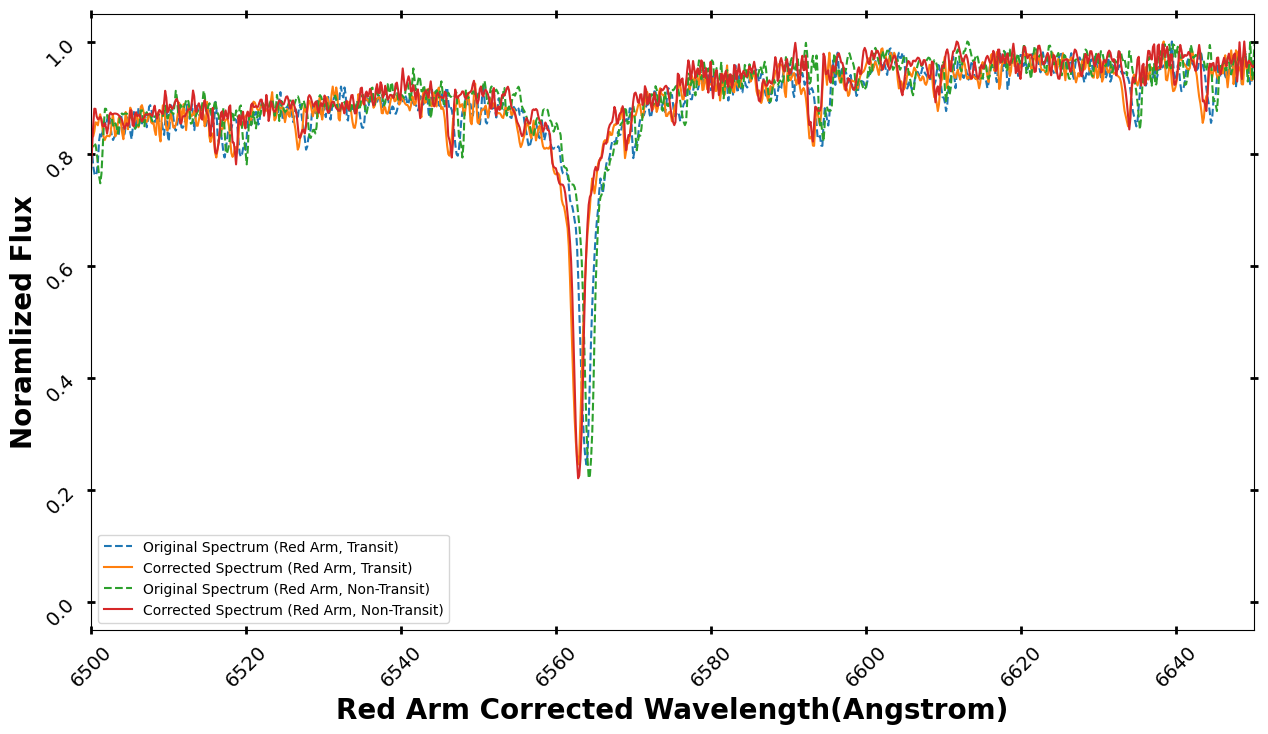

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def correct_wavelength_with_calibration(transit_spectrum, common_range, true_peak_wavelengths, observed_peak_wavelengths_transit, observed_peak_wavelengths_non_transit):
    # Calculate the correction factors based on the true and observed peaks for transit and non-transit
    correction_factor_transit = np.mean(true_peak_wavelengths - observed_peak_wavelengths_transit)
    correction_factor_non_transit = np.mean(true_peak_wavelengths - observed_peak_wavelengths_non_transit)

    # Correct the wavelength scale of the transit and non-transit spectra separately
    corrected_wavelength_transit = common_range + correction_factor_transit
    corrected_wavelength_non_transit = common_range + correction_factor_non_transit

    return corrected_wavelength_transit, corrected_wavelength_non_transit

'''
# Example true values for selected lines in the red arm from a high-resolution reference spectrum
selected_lines_true_values_red = np.array([6562.8,  6300.3 , 6583.4])  # Replace with actual values

# Example observed values for the selected lines in transit and non-transit spectra
observed_peaks_non_transit_red = np.array([6557.3716, 6297.2363, 6580.8193])  # Adjust with actual peak values
observed_peaks_transit_red = np.array([6563.8687, 6300.57, 6582.637])  # Adjust with actual peak values
'''

# Example true values for selected lines in the red arm from a high-resolution reference spectrum
selected_lines_true_values_red = np.array([6562.8 ])  # Replace with actual values

# Example observed values for the selected lines in transit and non-transit spectra
observed_peaks_transit_red = np.array([6563.8687])  # Adjust with actual peak values
observed_peaks_non_transit_red = np.array([6564.1714])  # Adjust with actual peak values


# Use the actual common range for the red arm obtained from find_common_range
common_range_red, _, _ = find_common_range(transit_wvr[0], transit_red[0], transit_wvr[0], non_transit_red[0])

# Correct the wavelength scale for the red arm using the selected lines
corrected_wavelength_red_transit, corrected_wavelength_red_non_transit = correct_wavelength_with_calibration(
    normalized_red, common_range_red, selected_lines_true_values_red, observed_peaks_transit_red, observed_peaks_non_transit_red
)

# Plot the original and corrected spectra for visualization
plt.figure(figsize=(15, 8))

# Plot for the red arm
plt.plot(common_range_red, normalized_red, linestyle='--', label='Original Spectrum (Red Arm, Transit)')
plt.plot(corrected_wavelength_red_transit, normalized_red, label='Corrected Spectrum (Red Arm, Transit)')

plt.plot(common_range_red, normalized_non_transit_red, linestyle='--', label='Original Spectrum (Red Arm, Non-Transit)')
plt.plot(corrected_wavelength_red_non_transit, normalized_non_transit_red, label='Corrected Spectrum (Red Arm, Non-Transit)')

# Set x-axis limits for the specific wavelength range
wavelength_range_red = [6500, 6650]  # Adjust with your desired range for the red arm
plt.xlim(wavelength_range_red[0], wavelength_range_red[1])

#plt.scatter(selected_lines_true_values_red, [0]*len(selected_lines_true_values_red), marker='x', color='red', label='True Values (Selected Lines)')
plt.xlabel('Red Arm Corrected Wavelength(Angstrom)', fontweight='bold', fontsize=20)
plt.ylabel('Noramlized Flux', fontweight='bold', fontsize=20)
plt.legend()
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()


Absorption Lines in Transit Spectrum (Blue Arm): []
Absorption Lines in Non-Transit Spectrum (Blue Arm): []
Absorption Lines in Transit Spectrum (Red Arm): [6542.58   6546.198  6549.0635 6553.1353 6555.399  6562.8   ]
Absorption Lines in Non-Transit Spectrum (Red Arm): [6539.867  6542.428  6544.2354 6546.4995 6549.8145 6552.2285 6555.55
 6562.8   ]


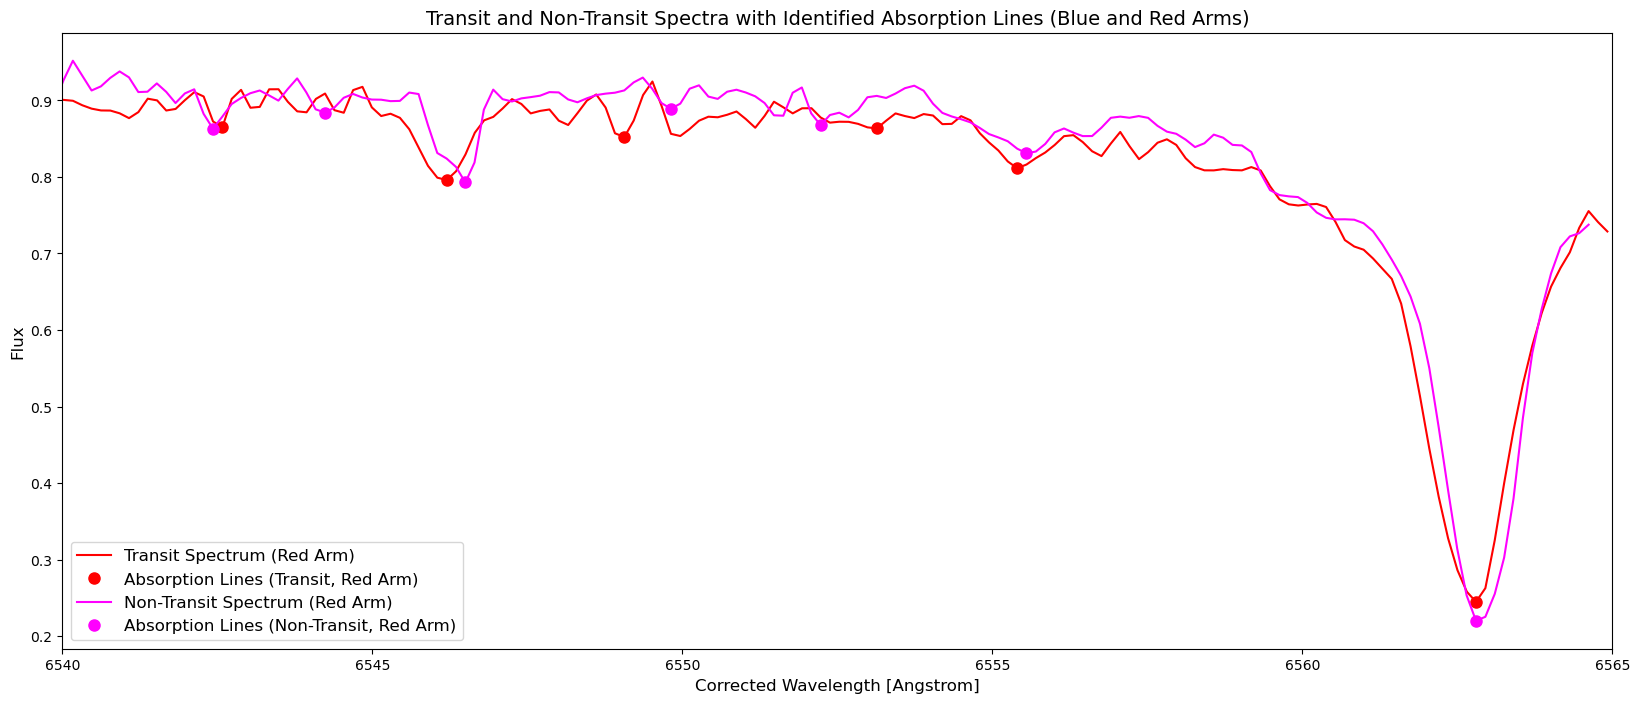

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

def find_and_plot_absorption_lines(corrected_wavelength_transit_blue, corrected_wavelength_transit_red, corrected_wavelength_non_transit_blue, corrected_wavelength_non_transit_red, transit_spectrum_blue, transit_spectrum_red, non_transit_spectrum_blue, non_transit_spectrum_red, wavelength_range, sensitivity):
    # Select the data within the wavelength range
    mask_blue = (corrected_wavelength_transit_blue >= wavelength_range[0]) & (corrected_wavelength_transit_blue <= wavelength_range[1])
    mask_red = (corrected_wavelength_transit_red >= wavelength_range[0]) & (corrected_wavelength_transit_red <= wavelength_range[1])

    # Check if there is any data in the wavelength range for each spectrum
    if not np.any(mask_blue) and not np.any(mask_red):
        print("No data in the specified wavelength range.")
        return

    # Find local minima in the blue arm transit spectrum
    minima_transit_blue = argrelextrema(transit_spectrum_blue[mask_blue], np.less, order=10)[0]

    # Find local minima in the red arm transit spectrum
    minima_transit_red = argrelextrema(transit_spectrum_red[mask_red], np.less, order=10)[0]

    # Find local minima in the blue arm non-transit spectrum
    minima_non_transit_blue = argrelextrema(non_transit_spectrum_blue[mask_blue], np.less, order=10)[0]

    # Find local minima in the red arm non-transit spectrum
    minima_non_transit_red = argrelextrema(non_transit_spectrum_red[mask_red], np.less, order=10)[0]

    # Print the wavelength values corresponding to the identified absorption lines
    print("Absorption Lines in Transit Spectrum (Blue Arm):", corrected_wavelength_transit_blue[mask_blue][minima_transit_blue])
    print("Absorption Lines in Non-Transit Spectrum (Blue Arm):", corrected_wavelength_non_transit_blue[mask_blue][minima_non_transit_blue])

    print("Absorption Lines in Transit Spectrum (Red Arm):", corrected_wavelength_transit_red[mask_red][minima_transit_red])
    print("Absorption Lines in Non-Transit Spectrum (Red Arm):", corrected_wavelength_non_transit_red[mask_red][minima_non_transit_red])

    # Create a new figure
    fig, ax = plt.subplots(figsize=(20, 8))

    # Plot the spectra with identified absorption lines
    if np.any(mask_blue):
        ax.plot(corrected_wavelength_transit_blue[mask_blue], transit_spectrum_blue[mask_blue], label='Transit Spectrum (Blue Arm)', color='blue')
        ax.plot(corrected_wavelength_transit_blue[mask_blue][minima_transit_blue], transit_spectrum_blue[mask_blue][minima_transit_blue], 'o', color='blue', markersize=8, label='Absorption Lines (Transit, Blue Arm)')

        ax.plot(corrected_wavelength_non_transit_blue[mask_blue], non_transit_spectrum_blue[mask_blue], label='Non-Transit Spectrum (Blue Arm)', color='cyan')
        ax.plot(corrected_wavelength_non_transit_blue[mask_blue][minima_non_transit_blue], non_transit_spectrum_blue[mask_blue][minima_non_transit_blue], 'o', color='cyan', markersize=8, label='Absorption Lines (Non-Transit, Blue Arm)')

    if np.any(mask_red):
        ax.plot(corrected_wavelength_transit_red[mask_red], transit_spectrum_red[mask_red], label='Transit Spectrum (Red Arm)', color='red')
        ax.plot(corrected_wavelength_transit_red[mask_red][minima_transit_red], transit_spectrum_red[mask_red][minima_transit_red], 'o', color='red', markersize=8, label='Absorption Lines (Transit, Red Arm)')

        ax.plot(corrected_wavelength_non_transit_red[mask_red], non_transit_spectrum_red[mask_red], label='Non-Transit Spectrum (Red Arm)', color='magenta')
        ax.plot(corrected_wavelength_non_transit_red[mask_red][minima_non_transit_red], non_transit_spectrum_red[mask_red][minima_non_transit_red], 'o', color='magenta', markersize=8, label='Absorption Lines (Non-Transit, Red Arm)')

    # Set x-axis limits
    ax.set_xlim(wavelength_range[0], wavelength_range[1])

    # Adjust the figure layout
    ax.set_xlabel('Corrected Wavelength [Angstrom]', fontsize=12)
    ax.set_ylabel('Flux', fontsize=12)
    ax.legend(fontsize=12)
    ax.set_title('Transit and Non-Transit Spectra with Identified Absorption Lines (Blue and Red Arms)', fontsize=14)

    plt.show()

# Use a broader wavelength range for plotting
find_and_plot_absorption_lines(
    corrected_wavelength_blue_transit, corrected_wavelength_red_transit,
    corrected_wavelength_blue_non_transit, corrected_wavelength_red_non_transit,
    normalized_blue, normalized_red, normalized_non_transit_blue, normalized_non_transit_red,
    [6540, 6565], sensitivity=0.01
)


In [23]:
#checking the wavelength range, just because v:
print(np.min(corrected_wavelength_red_transit),np.max(corrected_wavelength_red_transit)) #for red arm transit
print(np.min(corrected_wavelength_red_non_transit),np.max(corrected_wavelength_red_non_transit)) #red arm non tranist

6298.9233 6877.2144
6298.6206 6876.9116


In [24]:
print(np.min(corrected_wavelength_blue_transit),np.max(corrected_wavelength_blue_transit)) #blue arm transit
print(np.min(corrected_wavelength_blue_non_transit),np.max(corrected_wavelength_blue_non_transit)) #blue arm non transit

4929.4985 5376.607
4929.141 5376.2495


In [25]:
corrected_wavelength_red_transit


array([6298.9233, 6299.0684, 6299.214 , ..., 6876.8975, 6877.056 ,
       6877.2144], dtype=float32)

In [26]:
corrected_wavelength_red_non_transit

array([6298.6206, 6298.7656, 6298.911 , ..., 6876.5947, 6876.7534,
       6876.9116], dtype=float32)

Spectra have different lengths in the alignment region. Unable to perform direct subtraction.
Spectra have different lengths in the alignment region. Unable to perform direct subtraction.
Absorption Lines (Blue Arm): []
Emission Lines (Blue Arm): []
Absorption Lines (Red Arm): []
Emission Lines (Red Arm): []


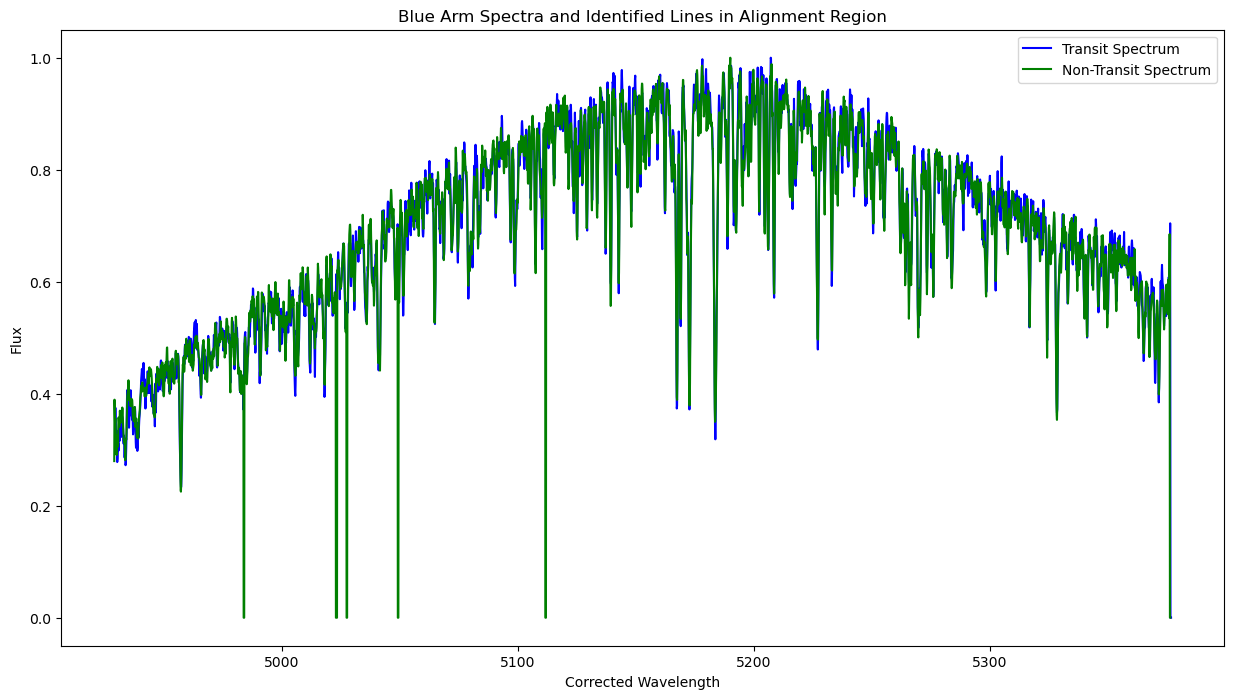

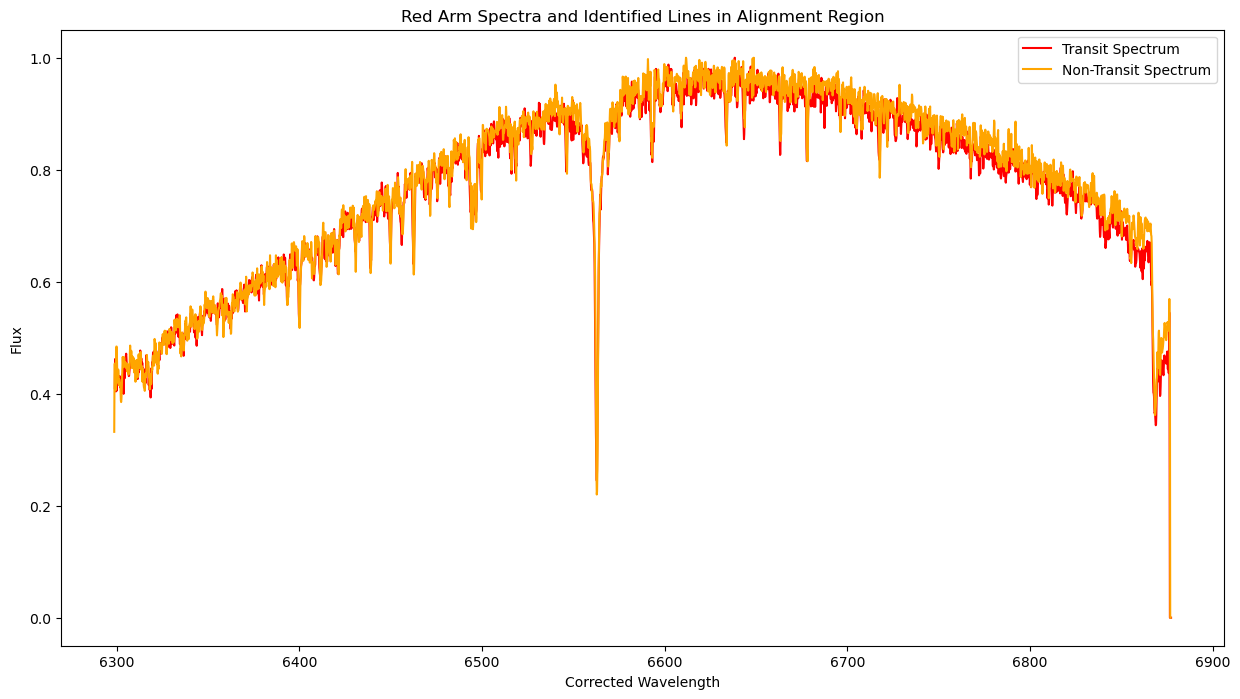

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to identify absorption and emission lines within user-specified alignment regions
def identify_lines_in_alignment_region(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                       alignment_region, threshold=0.1):
    # Check if the alignment region is provided
    if alignment_region is None or len(alignment_region) != 2:
        print("Invalid alignment region.")
        return np.array([]), np.array([])

    # Extract the alignment region for both spectra
    transit_mask = np.logical_and(transit_wavelength >= alignment_region[0], transit_wavelength <= alignment_region[1])
    non_transit_mask = np.logical_and(non_transit_wavelength >= alignment_region[0], non_transit_wavelength <= alignment_region[1])

    transit_wavelength_aligned = transit_wavelength[transit_mask]
    non_transit_wavelength_aligned = non_transit_wavelength[non_transit_mask]

    transit_flux_aligned = transit_flux[transit_mask]
    non_transit_flux_aligned = non_transit_flux[non_transit_mask]

    # Ensure both spectra have the same length in the alignment region
    if len(transit_flux_aligned) != len(non_transit_flux_aligned):
        print("Spectra have different lengths in the alignment region. Unable to perform direct subtraction.")
        return np.array([]), np.array([])

    # Calculate residuals (difference) between transit and non-transit flux in the alignment region
    residuals = transit_flux_aligned - non_transit_flux_aligned

    # Identify absorption lines (where residuals are negative)
    absorption_lines = transit_wavelength_aligned[residuals < -threshold]

    # Identify emission lines (where residuals are positive)
    emission_lines = transit_wavelength_aligned[residuals > threshold]

    return absorption_lines, emission_lines


# Blue arm alignment region
alignment_region_blue = [4929.4985, 5376.2495]  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue = identify_lines_in_alignment_region(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    alignment_region_blue
)


# Red arm alignment region
alignment_region_red = [6298.9233, 6876.9116]  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red = identify_lines_in_alignment_region(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    alignment_region_red
)

# Print or use the identified lines as needed
print("Absorption Lines (Blue Arm):", absorption_lines_blue)
print("Emission Lines (Blue Arm):", emission_lines_blue)

print("Absorption Lines (Red Arm):", absorption_lines_red)
print("Emission Lines (Red Arm):", emission_lines_red)

# Plot the spectra and identified lines for the blue arm using specified alignment region
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Transit Spectrum', color='blue')
plt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Non-Transit Spectrum', color='green')
#plt.scatter(absorption_lines_blue, np.ones_like(absorption_lines_blue), color='red', marker='v', label='Absorption Lines')
#plt.scatter(emission_lines_blue, np.ones_like(emission_lines_blue), color='purple', marker='^', label='Emission Lines')
plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Blue Arm Spectra and Identified Lines in Alignment Region')
plt.show()

# Plot the spectra and identified lines for the red arm using specified alignment region
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_red_transit, normalized_red, label='Transit Spectrum', color='red')
plt.plot(corrected_wavelength_red_non_transit, normalized_non_transit_red, label='Non-Transit Spectrum', color='orange')
#plt.scatter(absorption_lines_red, np.ones_like(absorption_lines_red), color='blue', marker='v', label='Absorption Lines')
#plt.scatter(emission_lines_red, np.ones_like(emission_lines_red), color='green', marker='^', label='Emission Lines')
plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Red Arm Spectra and Identified Lines in Alignment Region')
plt.show()


In [28]:
'''
import numpy as np
import matplotlib.pyplot as plt

# Function to identify absorption and emission lines within user-specified alignment regions
def identify_lines_in_alignment_region(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                       alignment_region, threshold=0.1):
    # Check if the alignment region is provided
    if alignment_region is None or len(alignment_region) != 2:
        print("Invalid alignment region.")
        return np.array([]), np.array([])

    # Extract the alignment region for both spectra
    transit_mask = np.logical_and(transit_wavelength >= alignment_region[0], transit_wavelength <= alignment_region[1])
    non_transit_mask = np.logical_and(non_transit_wavelength >= alignment_region[0], non_transit_wavelength <= alignment_region[1])

    transit_wavelength_aligned = transit_wavelength[transit_mask]
    non_transit_wavelength_aligned = non_transit_wavelength[non_transit_mask]

    transit_flux_aligned = transit_flux[transit_mask]
    non_transit_flux_aligned = non_transit_flux[non_transit_mask]

    # Check for NaN values in the aligned spectra
    if np.any(np.isnan(transit_flux_aligned)) or np.any(np.isnan(non_transit_flux_aligned)):
        print("NaN values detected in the aligned spectra. Unable to perform direct subtraction.")
        return np.array([]), np.array([])

    # Ensure both spectra have the same length in the alignment region
    if len(transit_flux_aligned) != len(non_transit_flux_aligned):
        print("Spectra have different lengths in the alignment region. Unable to perform direct subtraction.")
        print("Length of Transit Spectrum in Alignment Region:", len(transit_flux_aligned))
        print("Length of Non-Transit Spectrum in Alignment Region:", len(non_transit_flux_aligned))
        return np.array([]), np.array([])


    # Calculate residuals (difference) between transit and non-transit flux in the alignment region
    residuals = transit_flux_aligned - non_transit_flux_aligned

    # Identify absorption lines (where residuals are negative)
    absorption_lines = transit_wavelength_aligned[residuals < -threshold]

    # Identify emission lines (where residuals are positive)
    emission_lines = transit_wavelength_aligned[residuals > threshold]

    return absorption_lines, emission_lines


# Blue arm alignment region
alignment_region_blue = [4929.6, 5365.7246]  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue = identify_lines_in_alignment_region(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    alignment_region_blue
)


# Red arm alignment region
alignment_region_red = [6298.894, 6859.3394]  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red = identify_lines_in_alignment_region(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    alignment_region_red
)

# Print or use the identified lines as needed
print("Absorption Lines (Blue Arm):", absorption_lines_blue)
print("Emission Lines (Blue Arm):", emission_lines_blue)

print("Absorption Lines (Red Arm):", absorption_lines_red)
print("Emission Lines (Red Arm):", emission_lines_red)

# Plot the spectra and identified lines for the blue arm using specified alignment region
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Transit Spectrum', color='blue')
plt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Non-Transit Spectrum', color='green')
plt.scatter(absorption_lines_blue, np.ones_like(absorption_lines_blue), color='red', marker='v', label='Absorption Lines')
plt.scatter(emission_lines_blue, np.ones_like(emission_lines_blue), color='purple', marker='^', label='Emission Lines')
plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Blue Arm Spectra and Identified Lines in Alignment Region')
plt.show()

# Plot the spectra and identified lines for the red arm using specified alignment region
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_red_transit, normalized_red, label='Transit Spectrum', color='red')
plt.plot(corrected_wavelength_red_non_transit, normalized_non_transit_red, label='Non-Transit Spectrum', color='orange')
plt.scatter(absorption_lines_red, np.ones_like(absorption_lines_red), color='blue', marker='v', label='Absorption Lines')
plt.scatter(emission_lines_red, np.ones_like(emission_lines_red), color='green', marker='^', label='Emission Lines')
plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Red Arm Spectra and Identified Lines in Alignment Region')
plt.show()
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Function to identify absorption and emission lines within user-specified alignment regions\ndef identify_lines_in_alignment_region(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,\n                                       alignment_region, threshold=0.1):\n    # Check if the alignment region is provided\n    if alignment_region is None or len(alignment_region) != 2:\n        print("Invalid alignment region.")\n        return np.array([]), np.array([])\n\n    # Extract the alignment region for both spectra\n    transit_mask = np.logical_and(transit_wavelength >= alignment_region[0], transit_wavelength <= alignment_region[1])\n    non_transit_mask = np.logical_and(non_transit_wavelength >= alignment_region[0], non_transit_wavelength <= alignment_region[1])\n\n    transit_wavelength_aligned = transit_wavelength[transit_mask]\n    non_transit_wavelength_aligned = non_transit_wavelength[non_transit_mask]\n\

In [29]:
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to identify absorption and emission lines within user-specified alignment regions
def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, threshold=0.000005):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate residuals (difference) between transit and non-transit flux in the common range
    residuals = flux_transit_interpolated - flux_non_transit_interpolated

    # Identify absorption lines (where residuals are negative)
    absorption_lines = common_range[residuals < -threshold]

    # Identify emission lines (where residuals are positive)
    emission_lines = common_range[residuals > threshold]

    return absorption_lines, emission_lines, residuals

# Blue arm alignment region
common_range_blue = np.linspace(4929.6, 5365.7246, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue, residuals_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)

# Red arm alignment region
common_range_red = np.linspace(6298.894, 6859.3394, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red, residuals_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Print or use the identified lines and residuals as needed
print("Absorption Lines (Blue Arm):", absorption_lines_blue)
print("Emission Lines (Blue Arm):", emission_lines_blue)

print("Absorption Lines (Red Arm):", absorption_lines_red)
print("Emission Lines (Red Arm):", emission_lines_red)
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.interpolate import interp1d\n\n# Function to identify absorption and emission lines within user-specified alignment regions\ndef identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,\n                                   common_range, threshold=0.000005):\n    # Ensure common_range is not empty\n    if len(common_range) == 0:\n        print("No common wavelength range found.")\n        return np.array([]), np.array([]), np.array([])\n\n    # Interpolate flux values for one spectrum onto the wavelength grid of the other\n    f_transit = interp1d(transit_wavelength, transit_flux, kind=\'linear\', fill_value="extrapolate")\n    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind=\'linear\', fill_value="extrapolate")\n\n    # Evaluate interpolated flux values at the common wavelength range\n    flux_transit_interpolated = f_transit(common_range)\n    flu

In [30]:
'''
# Plot residuals for the blue arm
plt.figure(figsize=(15, 8))
threshold = 0.000005  # Define threshold here
plt.plot(common_range_blue, residuals_blue, label='Residuals', color='gray',linestyle='dashed' )
plt.scatter(absorption_lines_blue, residuals_blue[residuals_blue < -threshold], color='blue', marker='v', label='Absorption Lines')
plt.scatter(emission_lines_blue, residuals_blue[residuals_blue > threshold], color='green', marker='^', label='Emission Lines')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Corrected Wavelength')
plt.ylabel('Residuals (Transit - Non-Transit Flux)')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Blue Arm Residuals and Identified Lines in Common Range')
plt.show()
'''

"\n# Plot residuals for the blue arm\nplt.figure(figsize=(15, 8))\nthreshold = 0.000005  # Define threshold here\nplt.plot(common_range_blue, residuals_blue, label='Residuals', color='gray',linestyle='dashed' )\nplt.scatter(absorption_lines_blue, residuals_blue[residuals_blue < -threshold], color='blue', marker='v', label='Absorption Lines')\nplt.scatter(emission_lines_blue, residuals_blue[residuals_blue > threshold], color='green', marker='^', label='Emission Lines')\nplt.axhline(0, color='black', linestyle='dashed', linewidth=1)\nplt.xlabel('Corrected Wavelength')\nplt.ylabel('Residuals (Transit - Non-Transit Flux)')\nplt.legend(loc='upper right')  # Adjust legend position\nplt.title('Blue Arm Residuals and Identified Lines in Common Range')\nplt.show()\n"

In [31]:
'''
# Plot residuals for the red arm
plt.figure(figsize=(15, 8))
plt.plot(common_range_red, residuals_red, label='Residuals', color='gray', linestyle='dashed')
plt.scatter(absorption_lines_red, residuals_red[residuals_red < -threshold], color='red', marker='v', label='Absorption Lines')
plt.scatter(emission_lines_red, residuals_red[residuals_red > threshold], color='purple', marker='^', label='Emission Lines')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Corrected Wavelength')
plt.ylabel('Residuals (Transit - Non-Transit Flux)')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Red Arm Residuals and Identified Lines in Common Range')
plt.show()
'''

"\n# Plot residuals for the red arm\nplt.figure(figsize=(15, 8))\nplt.plot(common_range_red, residuals_red, label='Residuals', color='gray', linestyle='dashed')\nplt.scatter(absorption_lines_red, residuals_red[residuals_red < -threshold], color='red', marker='v', label='Absorption Lines')\nplt.scatter(emission_lines_red, residuals_red[residuals_red > threshold], color='purple', marker='^', label='Emission Lines')\nplt.axhline(0, color='black', linestyle='dashed', linewidth=1)\nplt.xlabel('Corrected Wavelength')\nplt.ylabel('Residuals (Transit - Non-Transit Flux)')\nplt.legend(loc='upper right')  # Adjust legend position\nplt.title('Red Arm Residuals and Identified Lines in Common Range')\nplt.show()\n"

In [32]:
'''
# Plot the spectra and identified lines for the blue arm using specified common range
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Transit Spectrum (Blue)', color='blue')
plt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Non-Transit Spectrum (Blue)', color='green')
#plt.scatter(absorption_lines_blue, np.ones_like(absorption_lines_blue), color='red', marker='v', label='Absorption Lines (Blue)')
#plt.scatter(emission_lines_blue, np.ones_like(emission_lines_blue), color='purple', marker='^', label='Emission Lines (Blue)')
plt.xlim(4929.6, 5365.7246 )


# Plot the spectra and identified lines for the red arm using specified common range
plt.figure(figsize=(15, 8))
plt.plot(corrected_wavelength_red_transit, normalized_red, label='Transit Spectrum (Red)', color='red')
plt.plot(corrected_wavelength_red_non_transit, normalized_non_transit_red, label='Non-Transit Spectrum (Red)', color='orange')
#plt.scatter(absorption_lines_red, np.ones_like(absorption_lines_red), color='blue', marker='v', label='Absorption Lines (Red)')
#plt.scatter(emission_lines_red, np.ones_like(emission_lines_red), color='green', marker='^', label='Emission Lines (Red)')
plt.xlim(6298.894, 6859.3394 )


plt.xlabel('Corrected Wavelength')
plt.ylabel('Flux')
plt.legend(loc='upper right')  # Adjust legend position
plt.title('Transit and Non-Transit Spectrum')
plt.show()
'''

"\n# Plot the spectra and identified lines for the blue arm using specified common range\nplt.figure(figsize=(15, 8))\nplt.plot(corrected_wavelength_blue_transit, normalized_blue, label='Transit Spectrum (Blue)', color='blue')\nplt.plot(corrected_wavelength_blue_non_transit, normalized_non_transit_blue, label='Non-Transit Spectrum (Blue)', color='green')\n#plt.scatter(absorption_lines_blue, np.ones_like(absorption_lines_blue), color='red', marker='v', label='Absorption Lines (Blue)')\n#plt.scatter(emission_lines_blue, np.ones_like(emission_lines_blue), color='purple', marker='^', label='Emission Lines (Blue)')\nplt.xlim(4929.6, 5365.7246 )\n\n\n# Plot the spectra and identified lines for the red arm using specified common range\nplt.figure(figsize=(15, 8))\nplt.plot(corrected_wavelength_red_transit, normalized_red, label='Transit Spectrum (Red)', color='red')\nplt.plot(corrected_wavelength_red_non_transit, normalized_non_transit_red, label='Non-Transit Spectrum (Red)', color='orange')\

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to identify absorption and emission lines within user-specified alignment regions
def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, min_snr=10, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate residuals (difference) between transit and non-transit flux in the common range
    residuals = flux_transit_interpolated - flux_non_transit_interpolated
    
    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(residuals, window_size, min_snr)

    # Identify absorption lines (where residuals are below the negative threshold)
    absorption_lines = common_range[residuals < -threshold]

    # Identify emission lines (where residuals are above the positive threshold)
    emission_lines = common_range[residuals > threshold]

    return absorption_lines, emission_lines, residuals

'''
def adaptive_threshold(residuals, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        threshold[i] = significance_factor * local_std

    return threshold
'''

def adaptive_threshold(residuals, window_size, min_snr=10):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        snr = np.abs(residuals[i]) / local_std if local_std != 0 else 0  # Prevent division by zero
        threshold[i] = min_snr * local_std if snr >= min_snr else 0  # Set threshold based on minimum SNR

    return threshold


# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue, residuals_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)

# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red, residuals_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Print or use the identified lines and residuals as needed
print("Absorption Lines (Blue Arm):", absorption_lines_blue)
print("Emission Lines (Blue Arm):", emission_lines_blue)

print("Absorption Lines (Red Arm):", absorption_lines_red)
print("Emission Lines (Red Arm):", emission_lines_red)

Absorption Lines (Blue Arm): [4929.4985     4930.3928964  4930.84009459 4931.28729279 4931.73449099
 4932.18168919 4932.62888739 4933.07608559 4933.52328378 4933.97048198
 4934.41768018 4934.86487838 4935.31207658 4935.75927477 4936.65367117
 4937.10086937 4937.54806757 4938.44246396 4938.88966216 4939.78405856
 4940.23125676 4942.46724775 4942.91444595 4944.25604054 4944.70323874
 4945.15043694 4946.93922973 4947.38642793 4947.83362613 4949.62241892
 4950.51681532 4950.96401351 4951.41121171 4951.85840991 4952.30560811
 4953.2000045  4953.6472027  4954.9887973  4955.4359955  4955.88319369
 4956.77759009 4957.67198649 4958.11918468 4960.35517568 4962.14396847
 4963.48556306 4963.93276126 4964.37995946 4964.82715766 4965.27435586
 4965.72155405 4967.06314865 4967.51034685 4969.29913964 4970.19353604
 4971.98232883 4973.32392342 4974.21831982 4974.66551802 4975.11271622
 4976.90150901 4977.34870721 4979.5846982  4980.0318964  4980.47909459
 4981.82068919 4982.71508559 4983.16228378 4983.

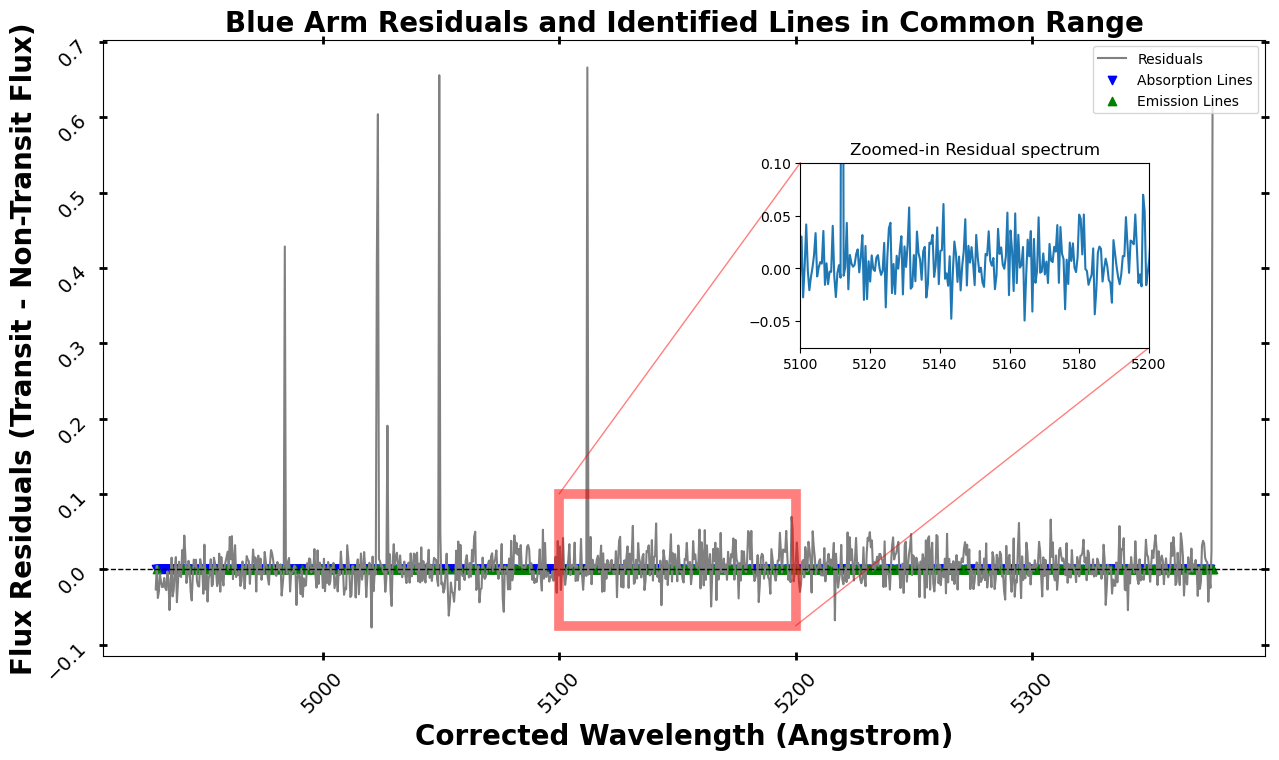

In [34]:
# Function to identify absorption and emission lines within user-specified alignment regions
def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, min_snr=10, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate residuals (difference) between transit and non-transit flux in the common range
    residuals = flux_transit_interpolated - flux_non_transit_interpolated
    
    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(residuals, window_size, min_snr)

    # Identify absorption lines (where residuals are below the negative threshold)
    absorption_lines = common_range[residuals < -threshold]

    # Identify emission lines (where residuals are above the positive threshold)
    emission_lines = common_range[residuals > threshold]

    return absorption_lines, emission_lines, residuals, threshold

'''
def adaptive_threshold(residuals, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        threshold[i] = significance_factor * local_std

    return threshold
'''

def adaptive_threshold(residuals, window_size, min_snr=10):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        snr = np.abs(residuals[i]) / local_std if local_std != 0 else 0  # Prevent division by zero
        threshold[i] = min_snr * local_std if snr >= min_snr else 0  # Set threshold based on minimum SNR

    return threshold


# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue, residuals_blue, threshold_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)


# Plot the residuals and identified lines
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(common_range_blue, residuals_blue, label='Residuals', color='gray', linestyle='solid')

# Plot absorption lines
for wavelength, threshold_value in zip(absorption_lines_blue, -threshold_blue):
    ax.scatter(wavelength, threshold_value, color='blue', marker='v', label='Absorption Lines' if wavelength == absorption_lines_blue[0] else None)

# Plot emission lines
for wavelength, threshold_value in zip(emission_lines_blue, threshold_blue):
    ax.scatter(wavelength, threshold_value, color='green', marker='^', label='Emission Lines' if wavelength == emission_lines_blue[0] else None)

ax.axhline(0, color='black', linestyle='dashed', linewidth=1)
ax.set_xlabel('Corrected Wavelength (Angstrom)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux Residuals (Transit - Non-Transit Flux)', fontweight='bold', fontsize=20)
ax.legend(loc='upper right')  # Adjust legend position
ax.set_title('Blue Arm Residuals and Identified Lines in Common Range', fontweight='bold', fontsize=20)

# Add inset manually
ax_inset = ax.inset_axes([0.6, 0.5, 0.3, 0.3])
ax_inset.plot(common_range_blue, residuals_blue)
ax_inset.set_xlim(5100, 5200)  # Set x-range for the inset axes
ax_inset.set_ylim(-0.075, 0.1)
ax.indicate_inset_zoom(ax_inset,edgecolor='red', lw =7)
ax_inset.set_title('Zoomed-in Residual spectrum')
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()

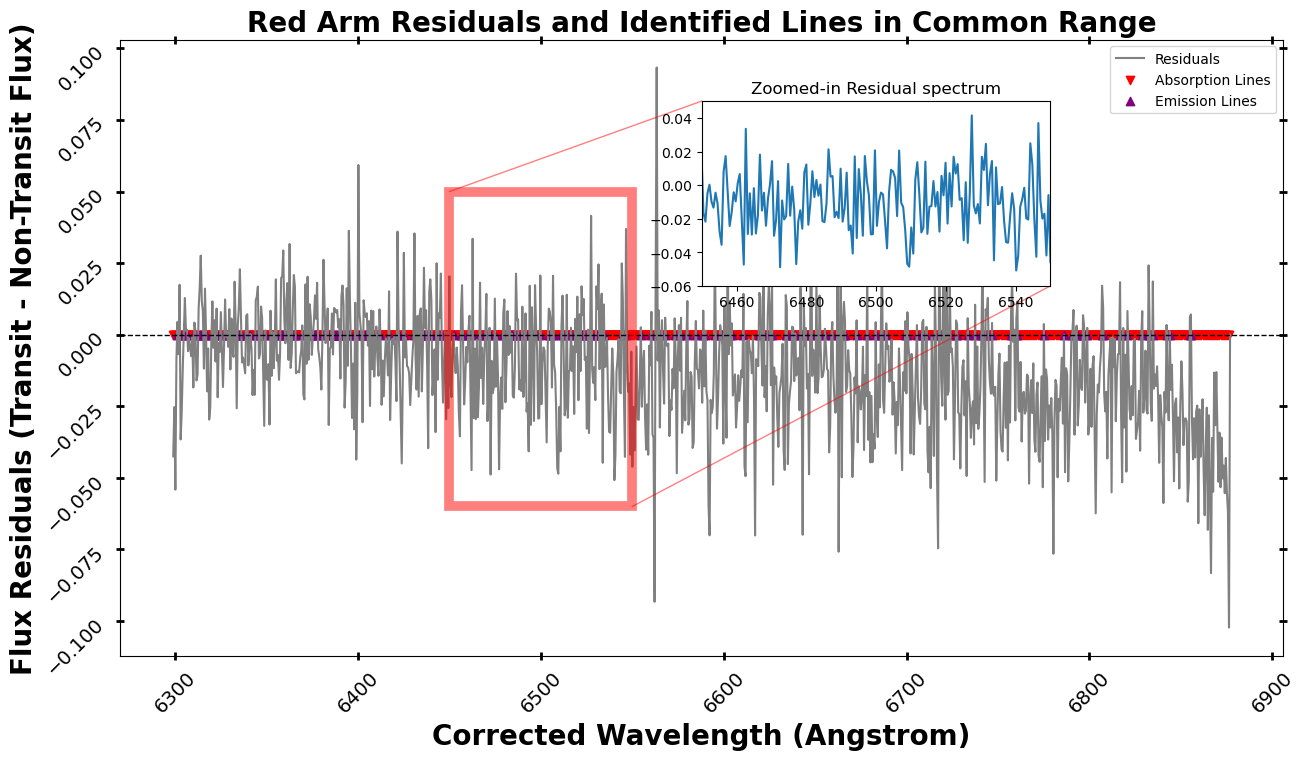

In [35]:
def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, min_snr=10, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate residuals (difference) between transit and non-transit flux in the common range
    residuals = flux_transit_interpolated - flux_non_transit_interpolated
    
    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(residuals, window_size, min_snr)

    # Identify absorption lines (where residuals are below the negative threshold)
    absorption_lines = common_range[residuals < -threshold]

    # Identify emission lines (where residuals are above the positive threshold)
    emission_lines = common_range[residuals > threshold]

    return absorption_lines, emission_lines, residuals, threshold

'''
def adaptive_threshold(residuals, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        threshold[i] = significance_factor * local_std

    return threshold
'''

def adaptive_threshold(residuals, window_size, min_snr=10):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        snr = np.abs(residuals[i]) / local_std if local_std != 0 else 0  # Prevent division by zero
        threshold[i] = min_snr * local_std if snr >= min_snr else 0  # Set threshold based on minimum SNR

    return threshold


# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red, residuals_red, threshold_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Plot the residuals and identified lines
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(common_range_red, residuals_red, label='Residuals', color='gray', linestyle='solid')

# Plot absorption lines
for wavelength, threshold_value in zip(absorption_lines_red, -threshold_red):
    ax.scatter(wavelength, threshold_value, color='red', marker='v', label='Absorption Lines' if wavelength == absorption_lines_red[0] else None)

# Plot emission lines
for wavelength, threshold_value in zip(emission_lines_red, threshold_red):
    ax.scatter(wavelength, threshold_value, color='purple', marker='^', label='Emission Lines' if wavelength == emission_lines_red[0] else None)

ax.axhline(0, color='black', linestyle='dashed', linewidth=1)
ax.set_xlabel('Corrected Wavelength (Angstrom)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux Residuals (Transit - Non-Transit Flux)', fontweight='bold', fontsize=20)
ax.legend(loc='upper right')  # Adjust legend position
ax.set_title('Red Arm Residuals and Identified Lines in Common Range', fontweight='bold', fontsize=20)

# Add inset manually
ax_inset = ax.inset_axes([0.5, 0.6, 0.3, 0.3])
ax_inset.plot(common_range_red, residuals_red)
ax_inset.set_xlim(6450, 6550)  # Set x-range for the inset axes
ax_inset.set_ylim(-0.06, 0.05)
ax.indicate_inset_zoom(ax_inset,edgecolor='red', lw =7)
ax_inset.set_title('Zoomed-in Residual spectrum')
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()

In [36]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

def load_csv(file_path):
    df = pd.read_csv(file_path)
    # Drop rows with NaN values in the 'obs_wl_air(A)' column
    df.dropna(subset=['obs_wl_air(A)'], inplace=True)
    return df

def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, min_snr=10, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate residuals (difference) between transit and non-transit flux in the common range
    residuals = flux_transit_interpolated - flux_non_transit_interpolated
    
    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(residuals, window_size, min_snr)

    # Identify absorption lines (where residuals are below the negative threshold)
    absorption_lines = common_range[residuals < -threshold]

    # Identify emission lines (where residuals are above the positive threshold)
    emission_lines = common_range[residuals > threshold]

    return absorption_lines, emission_lines, residuals

'''
def adaptive_threshold(residuals, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        threshold[i] = significance_factor * local_std

    return threshold
'''

def adaptive_threshold(residuals, window_size, min_snr=10):
    half_window = window_size // 2
    threshold = np.zeros_like(residuals)

    for i in range(len(residuals)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(residuals), i + half_window + 1)
        local_std = np.std(residuals[start_idx:end_idx])
        snr = np.abs(residuals[i]) / local_std if local_std != 0 else 0  # Prevent division by zero
        threshold[i] = min_snr * local_std if snr >= min_snr else 0  # Set threshold based on minimum SNR

    return threshold

#cross check function
def cross_check_wavelengths_with_csv(wavelengths, df, tolerance=0.1):
    # Initialize lists to store results
    ions = []
    sp_nums = []

    # Iterate over each wavelength
    for wavelength in wavelengths:
        # Find the closest wavelength in the CSV data within the specified tolerance
        closest_matches = df[df['obs_wl_air(A)'].between(wavelength - tolerance, wavelength + tolerance)]

        # Extract corresponding ion and sp_num from the CSV data
        if not closest_matches.empty:
            ion = closest_matches['element'].values[0]
            sp_num = closest_matches['sp_num'].values[0]

            # Append results to lists
            ions.append(ion)
            sp_nums.append(sp_num)
        else:
            # Append placeholders if no match is found
            ions.append(None)
            sp_nums.append(None)

    return ions, sp_nums


def print_results(lines, ions, sp_nums, arm_name):
    print(f"Cross-checked {len(lines)} Lines ({arm_name} Arm):")
    
    min_length = min(len(lines), len(ions), len(sp_nums))
    
    for i in range(min_length):
        print(f"Wavelength: {lines[i]}, Ion: {ions[i]}, sp_num: {sp_nums[i]}")
        
'''

def print_results(lines, ions, sp_nums, arm_name):
    print(f"Cross-checked {len(lines)} Lines ({arm_name} Arm):")
    
    for i, wavelength in enumerate(lines):
        ion = ions[i] if i < len(ions) else None
        sp_num = sp_nums[i] if i < len(sp_nums) else None
        print(f"Wavelength: {wavelength}, Ion: {ion}, sp_num: {sp_num}")
'''        

# Load your CSV data
df = load_csv('lines.csv')

# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)
absorption_lines_blue, emission_lines_blue, residuals_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)

# Cross-check absorption and emission lines for the Blue Arm
ions_blue, sp_nums_blue = cross_check_wavelengths_with_csv(absorption_lines_blue, df)
print_results(absorption_lines_blue, ions_blue, sp_nums_blue, "Blue Absorption")
print_results(emission_lines_blue, ions_blue, sp_nums_blue, "Blue Emission")  # Corrected line

# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)
absorption_lines_red, emission_lines_red, residuals_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Cross-check absorption and emission lines for the Red Arm
ions_red, sp_nums_red = cross_check_wavelengths_with_csv(absorption_lines_red, df)
print_results(absorption_lines_red, ions_red, sp_nums_red, "Red Absorption")
print_results(emission_lines_red, ions_red, sp_nums_red, "Red Emission")



Cross-checked 467 Lines (Blue Absorption Arm):
Wavelength: 4929.4985, Ion: None, sp_num: None
Wavelength: 4930.392896396396, Ion: Fe, sp_num: 1
Wavelength: 4930.840094594594, Ion: Y, sp_num: 1
Wavelength: 4931.287292792793, Ion: None, sp_num: None
Wavelength: 4931.734490990991, Ion: None, sp_num: None
Wavelength: 4932.181689189189, Ion: None, sp_num: None
Wavelength: 4932.628887387387, Ion: Cr, sp_num: 1
Wavelength: 4933.076085585585, Ion: None, sp_num: None
Wavelength: 4933.523283783784, Ion: Th, sp_num: 2
Wavelength: 4933.970481981982, Ion: Fe, sp_num: 1
Wavelength: 4934.41768018018, Ion: None, sp_num: None
Wavelength: 4934.864878378378, Ion: La, sp_num: 2
Wavelength: 4935.312076576576, Ion: None, sp_num: None
Wavelength: 4935.759274774775, Ion: Ag, sp_num: 1
Wavelength: 4936.653671171171, Ion: Cu, sp_num: 1
Wavelength: 4937.100869369369, Ion: None, sp_num: None
Wavelength: 4937.548067567567, Ion: Cr, sp_num: 1
Wavelength: 4938.442463963964, Ion: Ru, sp_num: 1
Wavelength: 4938.889662

Cross-checked 736 Lines (Red Absorption Arm):
Wavelength: 6298.9233, Ion: None, sp_num: None
Wavelength: 6299.501866866867, Ion: Tm, sp_num: 2
Wavelength: 6300.080433733734, Ion: None, sp_num: None
Wavelength: 6300.659000600601, Ion: None, sp_num: None
Wavelength: 6301.8161343343345, Ion: Mo, sp_num: 1
Wavelength: 6302.973268068068, Ion: None, sp_num: None
Wavelength: 6303.551834934935, Ion: None, sp_num: None
Wavelength: 6304.130401801802, Ion: None, sp_num: None
Wavelength: 6307.023236136137, Ion: Sm, sp_num: 2
Wavelength: 6307.601803003004, Ion: None, sp_num: None
Wavelength: 6308.18036986987, Ion: Yb, sp_num: 2
Wavelength: 6308.758936736737, Ion: None, sp_num: None
Wavelength: 6309.337503603604, Ion: None, sp_num: None
Wavelength: 6309.916070470471, Ion: None, sp_num: None
Wavelength: 6311.651771071071, Ion: None, sp_num: None
Wavelength: 6312.230337937938, Ion: Ti, sp_num: 1
Wavelength: 6315.701739139139, Ion: None, sp_num: None
Wavelength: 6317.4374397397405, Ion: None, sp_num: N

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def identify_significant_lines(ratio_values, threshold_values, significance_factor):
    significant_absorption_lines = []
    significant_emission_lines = []
    for i in range(len(ratio_values)):
        if ratio_values[i] < 1 and ratio_values[i] <  threshold_values[i]:
            significant_absorption_lines.append(i)
        elif ratio_values[i] > 1 and ratio_values[i] >  threshold_values[i]:
            significant_emission_lines.append(i)
    return significant_absorption_lines, significant_emission_lines

def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, significance_factor=1,window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate the ratio of transit to non-transit flux
    ratio = np.zeros_like(flux_transit_interpolated)  # Initialize ratio array

    # Avoid division by zero
    non_zero_indices = flux_non_transit_interpolated != 0
    ratio[non_zero_indices] = flux_transit_interpolated[non_zero_indices] / flux_non_transit_interpolated[non_zero_indices]

    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(ratio, window_size, significance_factor)

    # Identify significant absorption and emission lines
    significant_absorption_lines, significant_emission_lines = identify_significant_lines(ratio, threshold, significance_factor)

    return significant_absorption_lines, significant_emission_lines, ratio

'''
def adaptive_threshold(ratio_values, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        threshold[i] = max(0, min(1, significance_factor * local_std))

    return threshold
'''
def adaptive_threshold(ratio_values, window_size, significance_factor=1):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        snr = np.abs(ratio_values[i]) / local_std if local_std != 0 else 0  # Calculate SNR
        threshold[i] = significance_factor * snr

    return threshold

# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the blue arm using specified alignment region
absorption_lines_blue, emission_lines_blue, ratio_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)

# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)  # Replace with your specified alignment region

# Identify absorption and emission lines for the red arm using specified alignment region
absorption_lines_red, emission_lines_red, ratio_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Print or use the identified lines and residuals as needed
print("Absorption Lines (Blue Arm):", common_range_blue[absorption_lines_blue])
print("Emission Lines (Blue Arm):", common_range_blue[emission_lines_blue])

print("Absorption Lines (Red Arm):", common_range_red[absorption_lines_red])
print("Emission Lines (Red Arm):", common_range_red[emission_lines_red])

Absorption Lines (Blue Arm): [4929.4985     4930.3928964  4930.84009459 4931.28729279 4931.73449099
 4932.18168919 4932.62888739 4933.07608559 4933.52328378 4933.97048198
 4934.41768018 4934.86487838 4935.31207658 4935.75927477 4936.65367117
 4937.10086937 4937.54806757 4938.44246396 4938.88966216 4939.78405856
 4940.23125676 4942.46724775 4942.91444595 4944.25604054 4944.70323874
 4945.15043694 4946.93922973 4947.38642793 4947.83362613 4949.62241892
 4950.51681532 4950.96401351 4951.41121171 4951.85840991 4952.30560811
 4953.2000045  4953.6472027  4954.9887973  4955.4359955  4955.88319369
 4956.77759009 4957.67198649 4958.11918468 4960.35517568 4962.14396847
 4963.48556306 4963.93276126 4964.37995946 4964.82715766 4965.27435586
 4965.72155405 4967.06314865 4967.51034685 4969.29913964 4970.19353604
 4971.98232883 4973.32392342 4974.21831982 4974.66551802 4975.11271622
 4976.90150901 4977.34870721 4979.5846982  4980.0318964  4980.47909459
 4981.82068919 4982.71508559 4983.16228378 4983.

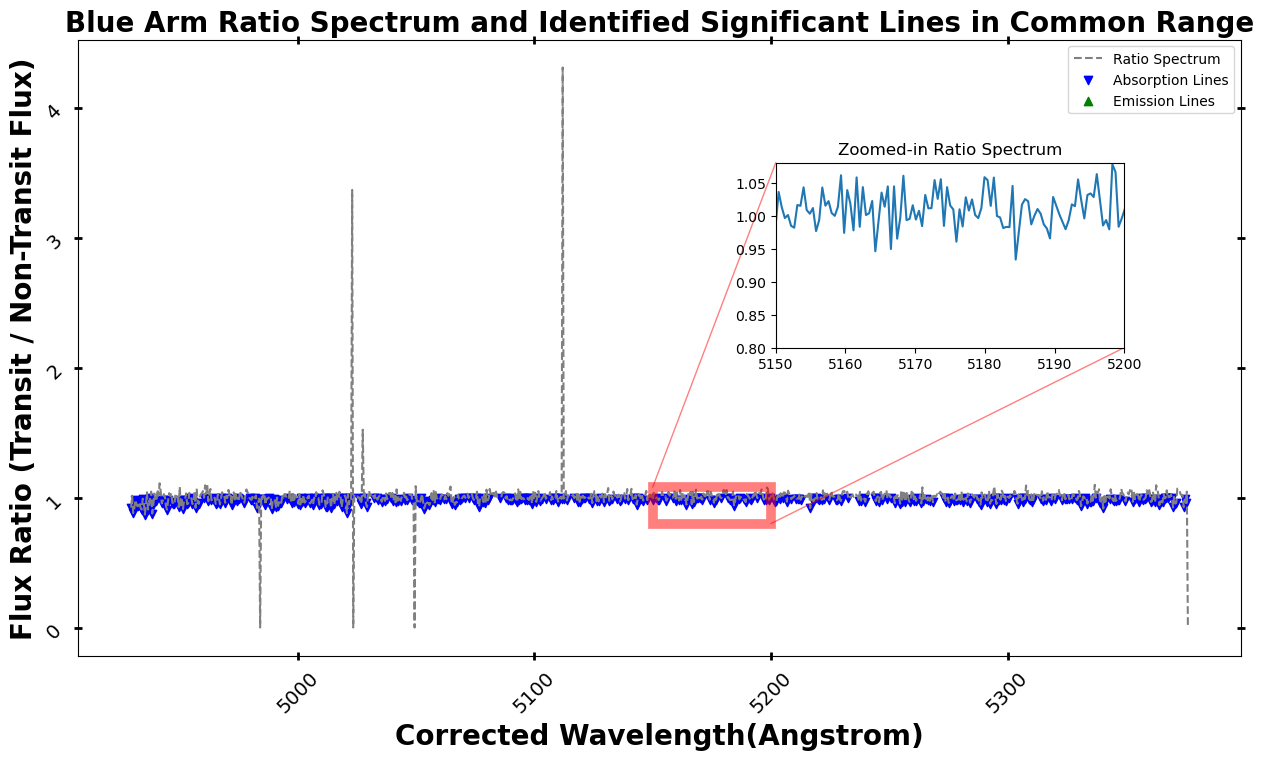

In [41]:
def identify_significant_lines(ratio_values, threshold_values, significance_factor):
    significant_absorption_lines = []
    significant_emission_lines = []
    for i in range(len(ratio_values)):
        if ratio_values[i] < 1 and ratio_values[i] <  threshold_values[i]:
            significant_absorption_lines.append(i)
        elif ratio_values[i] > 1 and ratio_values[i] >  threshold_values[i]:
            significant_emission_lines.append(i)
    return significant_absorption_lines, significant_emission_lines

def plot_significant_lines(wavelengths, values, significant_lines, color, marker, label):
    plt.scatter(wavelengths[significant_lines], values[significant_lines], color=color, marker=marker, label=label)

def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, significance_factor=1, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate the ratio of transit to non-transit flux
    ratio = np.zeros_like(flux_transit_interpolated)  # Initialize ratio array

    # Avoid division by zero
    non_zero_indices = flux_non_transit_interpolated != 0
    ratio[non_zero_indices] = flux_transit_interpolated[non_zero_indices] / flux_non_transit_interpolated[non_zero_indices]

    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(ratio, window_size, significance_factor)

    # Identify significant absorption and emission lines
    significant_absorption_lines, significant_emission_lines = identify_significant_lines(ratio, threshold, significance_factor)

    return significant_absorption_lines, significant_emission_lines, ratio, threshold

'''
def adaptive_threshold(ratio_values, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        threshold[i] = max(0, min(1, significance_factor * local_std))

    return threshold
'''
def adaptive_threshold(ratio_values, window_size, significance_factor=1):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        snr = np.abs(ratio_values[i]) / local_std if local_std != 0 else 0  # Calculate SNR
        threshold[i] = significance_factor * snr

    return threshold

# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)  # Replace with your specified alignment region

# Identify significant absorption and emission lines for the blue arm using specified alignment region
significant_absorption_lines_blue, significant_emission_lines_blue, ratio_blue, threshold_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)


# Plot the ratio spectrum and identified significant lines
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(common_range_blue, ratio_blue, label='Ratio Spectrum', color='gray', linestyle='dashed')

# Plot significant absorption lines
plot_significant_lines(common_range_blue, ratio_blue, significant_absorption_lines_blue, 'blue', 'v', 'Absorption Lines')

# Plot significant emission lines
plot_significant_lines(common_range_blue, ratio_blue, significant_emission_lines_blue, 'green', '^', 'Emission Lines')

# Plot the adaptive threshold
# plt.plot(common_range_blue, threshold_blue, label='Threshold', color='red', linestyle='dotted')

ax.set_xlabel('Corrected Wavelength(Angstrom)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux Ratio (Transit / Non-Transit Flux)', fontweight='bold', fontsize=20)
ax.legend(loc='upper right')  # Adjust legend position
ax.set_title('Blue Arm Ratio Spectrum and Identified Significant Lines in Common Range', fontweight='bold', fontsize=20)

# Create inset manually for zoomed-in part
ax_inset = ax.inset_axes([0.6, 0.5, 0.3, 0.3])
ax_inset.plot(common_range_blue, ratio_blue)
ax_inset.set_xlim(5150, 5200)  # Set x-range for the inset axes
ax_inset.set_ylim(0.8, 1.08)
ax.indicate_inset_zoom(ax_inset,edgecolor='red', lw =7)
ax_inset.set_title('Zoomed-in Ratio Spectrum')
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()

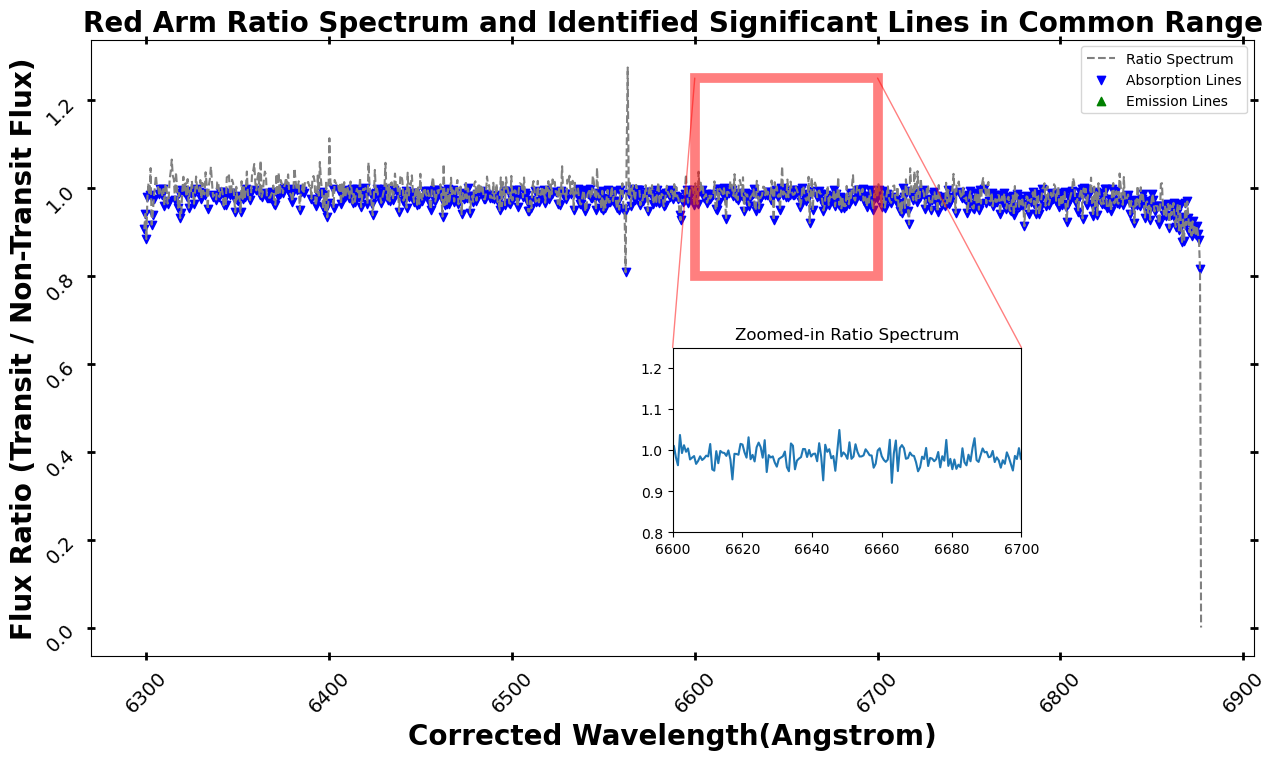

In [42]:
def identify_significant_lines(ratio_values, threshold_values, significance_factor):
    significant_absorption_lines = []
    significant_emission_lines = []
    for i in range(len(ratio_values)):
        if ratio_values[i] < 1 and ratio_values[i] <  threshold_values[i]:
            significant_absorption_lines.append(i)
        elif ratio_values[i] > 1 and ratio_values[i] >  threshold_values[i]:
            significant_emission_lines.append(i)
    return significant_absorption_lines, significant_emission_lines

def plot_significant_lines(wavelengths, values, significant_lines, color, marker, label):
    plt.scatter(wavelengths[significant_lines], values[significant_lines], color=color, marker=marker, label=label)

def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, significance_factor=1, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate the ratio of transit to non-transit flux
    ratio = np.zeros_like(flux_transit_interpolated)  # Initialize ratio array

    # Avoid division by zero
    non_zero_indices = flux_non_transit_interpolated != 0
    ratio[non_zero_indices] = flux_transit_interpolated[non_zero_indices] / flux_non_transit_interpolated[non_zero_indices]

    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(ratio, window_size, significance_factor)

    # Identify significant absorption and emission lines
    significant_absorption_lines, significant_emission_lines = identify_significant_lines(ratio, threshold, significance_factor)

    return significant_absorption_lines, significant_emission_lines, ratio, threshold

'''
def adaptive_threshold(ratio_values, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        threshold[i] = max(0, min(1, significance_factor * local_std))

    return threshold
'''
def adaptive_threshold(ratio_values, window_size, significance_factor=1):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        snr = np.abs(ratio_values[i]) / local_std if local_std != 0 else 0  # Calculate SNR
        threshold[i] = significance_factor * snr

    return threshold

# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)  # Replace with your specified alignment region

# Identify significant absorption and emission lines for the red arm using specified alignment region
significant_absorption_lines_red, significant_emission_lines_red, ratio_red, threshold_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Plot the ratio spectrum and identified significant lines
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(common_range_red, ratio_red, label='Ratio Spectrum', color='gray', linestyle='dashed')

# Plot significant absorption lines
plot_significant_lines(common_range_red, ratio_red, significant_absorption_lines_red, 'blue', 'v', 'Absorption Lines')

# Plot significant emission lines
plot_significant_lines(common_range_red, ratio_red, significant_emission_lines_red, 'green', '^', 'Emission Lines')

ax.set_xlabel('Corrected Wavelength(Angstrom)', fontweight='bold', fontsize=20)
ax.set_ylabel('Flux Ratio (Transit / Non-Transit Flux)', fontweight='bold', fontsize=20)
ax.legend(loc='upper right')  # Adjust legend position
ax.set_title('Red Arm Ratio Spectrum and Identified Significant Lines in Common Range', fontweight='bold', fontsize=20)

# Create inset manually for zoomed-in part
ax_inset = ax.inset_axes([0.5, 0.2, 0.3, 0.3])
ax_inset.plot(common_range_red, ratio_red)
ax_inset.set_xlim(6600, 6700)  # Set x-range for the inset axes
ax_inset.set_ylim(0.8, 1.25)
ax.indicate_inset_zoom(ax_inset,edgecolor='red', lw =7)
ax_inset.set_title('Zoomed-in Ratio Spectrum')
# Set tick labels to bold
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, labelcolor='black', pad=6, direction='inout', bottom=True, top=True, left=True, right=True, grid_color='grey', grid_alpha=0.5, grid_linestyle='--', labelrotation=45, colors='black', grid_linewidth=1.5)
plt.show()


In [40]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

def load_csv(file_path):
    df = pd.read_csv(file_path)
    # Drop rows with NaN values in the 'obs_wl_air(A)' column
    df.dropna(subset=['obs_wl_air(A)'], inplace=True)
    return df

def identify_significant_lines(ratio_values, threshold_values, significance_factor):
    significant_absorption_lines = []
    significant_emission_lines = []
    for i in range(len(ratio_values)):
        if ratio_values[i] < 1 and ratio_values[i] <  threshold_values[i]:
            significant_absorption_lines.append(i)
        elif ratio_values[i] > 1 and ratio_values[i] >  threshold_values[i]:
            significant_emission_lines.append(i)
    return significant_absorption_lines, significant_emission_lines

def identify_lines_in_common_range(transit_wavelength, transit_flux, non_transit_wavelength, non_transit_flux,
                                   common_range, significance_factor=1, window_size=10):
    # Ensure common_range is not empty
    if len(common_range) == 0:
        print("No common wavelength range found.")
        return np.array([]), np.array([]), np.array([])

    # Interpolate flux values for one spectrum onto the wavelength grid of the other
    f_transit = interp1d(transit_wavelength, transit_flux, kind='linear', fill_value="extrapolate")
    f_non_transit = interp1d(non_transit_wavelength, non_transit_flux, kind='linear', fill_value="extrapolate")

    # Evaluate interpolated flux values at the common wavelength range
    flux_transit_interpolated = f_transit(common_range)
    flux_non_transit_interpolated = f_non_transit(common_range)

    # Calculate the ratio of transit to non-transit flux
    ratio = np.zeros_like(flux_transit_interpolated)  # Initialize ratio array

    # Avoid division by zero
    non_zero_indices = flux_non_transit_interpolated != 0
    ratio[non_zero_indices] = flux_transit_interpolated[non_zero_indices] / flux_non_transit_interpolated[non_zero_indices]

    # Calculate adaptive threshold for each data point using rolling window
    threshold = adaptive_threshold(ratio, window_size, significance_factor)

    # Identify significant absorption and emission lines
    significant_absorption_lines, significant_emission_lines = identify_significant_lines(ratio, threshold, significance_factor)

    return significant_absorption_lines, significant_emission_lines, ratio, threshold

'''
def adaptive_threshold(ratio_values, window_size, significance_factor=3):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        threshold[i] = max(0, min(1, significance_factor * local_std))

    return threshold
'''
def adaptive_threshold(ratio_values, window_size, significance_factor=1):
    half_window = window_size // 2
    threshold = np.zeros_like(ratio_values)

    for i in range(len(ratio_values)):
        start_idx = max(0, i - half_window)
        end_idx = min(len(ratio_values), i + half_window + 1)
        local_std = np.std(ratio_values[start_idx:end_idx])
        snr = np.abs(ratio_values[i]) / local_std if local_std != 0 else 0  # Calculate SNR
        threshold[i] = significance_factor * snr

    return threshold

#cross check function
def cross_check_wavelengths_with_csv(wavelengths, df, tolerance=0.1):
    # Initialize lists to store results
    ions = []
    sp_nums = []

    # Iterate over each wavelength
    for wavelength in wavelengths:
        # Find the closest wavelength in the CSV data within the specified tolerance
        closest_matches = df[df['obs_wl_air(A)'].between(wavelength - tolerance, wavelength + tolerance)]

        # Extract corresponding ion and sp_num from the CSV data
        if not closest_matches.empty:
            ion = closest_matches['element'].values[0]
            sp_num = closest_matches['sp_num'].values[0]

            # Append results to lists
            ions.append(ion)
            sp_nums.append(sp_num)
        else:
            # Append placeholders if no match is found
            ions.append(None)
            sp_nums.append(None)

    return ions, sp_nums


def print_results(wavelengths, ions, sp_nums, arm_name):
    print(f"Cross-checked {len(wavelengths)} Lines ({arm_name} Arm):")
    
    min_length = min(len(wavelengths), len(ions), len(sp_nums))
    
    for i in range(min_length):
        print(f"Wavelength: {wavelengths[i]}, Ion: {ions[i]}, sp_num: {sp_nums[i]}")

# Load your CSV data
df = load_csv('lines.csv')

# Blue arm alignment region
common_range_blue = np.linspace(4929.4985, 5376.2495, 1000)
absorption_lines_blue, emission_lines_blue, ratio_blue, threshold_blue = identify_lines_in_common_range(
    corrected_wavelength_blue_transit, normalized_blue,
    corrected_wavelength_blue_non_transit, normalized_non_transit_blue,
    common_range_blue
)

# Cross-check absorption and emission lines for the Blue Arm
ions_blue, sp_nums_blue = cross_check_wavelengths_with_csv([common_range_blue[i] for i in absorption_lines_blue], df)
print_results([common_range_blue[i] for i in absorption_lines_blue], ions_blue, sp_nums_blue, "Blue Absorption")
ions_blue, sp_nums_blue = cross_check_wavelengths_with_csv([common_range_blue[i] for i in emission_lines_blue], df)
print_results([common_range_blue[i] for i in emission_lines_blue], ions_blue, sp_nums_blue, "Blue Emission")  # Corrected line

# Red arm alignment region
common_range_red = np.linspace(6298.9233, 6876.9116, 1000)
absorption_lines_red, emission_lines_red, ratio_red, threshold_red = identify_lines_in_common_range(
    corrected_wavelength_red_transit, normalized_red,
    corrected_wavelength_red_non_transit, normalized_non_transit_red,
    common_range_red
)

# Cross-check absorption and emission lines for the Red Arm
ions_red, sp_nums_red = cross_check_wavelengths_with_csv([common_range_red[i] for i in absorption_lines_red], df)
print_results([common_range_red[i] for i in absorption_lines_red], ions_red, sp_nums_red, "Red Absorption")
ions_red, sp_nums_red = cross_check_wavelengths_with_csv([common_range_red[i] for i in emission_lines_red], df)
print_results([common_range_red[i] for i in emission_lines_red], ions_red, sp_nums_red, "Red Emission")


Cross-checked 467 Lines (Blue Absorption Arm):
Wavelength: 4929.4985, Ion: None, sp_num: None
Wavelength: 4930.392896396396, Ion: Fe, sp_num: 1
Wavelength: 4930.840094594594, Ion: Y, sp_num: 1
Wavelength: 4931.287292792793, Ion: None, sp_num: None
Wavelength: 4931.734490990991, Ion: None, sp_num: None
Wavelength: 4932.181689189189, Ion: None, sp_num: None
Wavelength: 4932.628887387387, Ion: Cr, sp_num: 1
Wavelength: 4933.076085585585, Ion: None, sp_num: None
Wavelength: 4933.523283783784, Ion: Th, sp_num: 2
Wavelength: 4933.970481981982, Ion: Fe, sp_num: 1
Wavelength: 4934.41768018018, Ion: None, sp_num: None
Wavelength: 4934.864878378378, Ion: La, sp_num: 2
Wavelength: 4935.312076576576, Ion: None, sp_num: None
Wavelength: 4935.759274774775, Ion: Ag, sp_num: 1
Wavelength: 4936.653671171171, Ion: Cu, sp_num: 1
Wavelength: 4937.100869369369, Ion: None, sp_num: None
Wavelength: 4937.548067567567, Ion: Cr, sp_num: 1
Wavelength: 4938.442463963964, Ion: Ru, sp_num: 1
Wavelength: 4938.889662

Cross-checked 736 Lines (Red Absorption Arm):
Wavelength: 6298.9233, Ion: None, sp_num: None
Wavelength: 6299.501866866867, Ion: Tm, sp_num: 2
Wavelength: 6300.080433733734, Ion: None, sp_num: None
Wavelength: 6300.659000600601, Ion: None, sp_num: None
Wavelength: 6301.8161343343345, Ion: Mo, sp_num: 1
Wavelength: 6302.973268068068, Ion: None, sp_num: None
Wavelength: 6303.551834934935, Ion: None, sp_num: None
Wavelength: 6304.130401801802, Ion: None, sp_num: None
Wavelength: 6307.023236136137, Ion: Sm, sp_num: 2
Wavelength: 6307.601803003004, Ion: None, sp_num: None
Wavelength: 6308.18036986987, Ion: Yb, sp_num: 2
Wavelength: 6308.758936736737, Ion: None, sp_num: None
Wavelength: 6309.337503603604, Ion: None, sp_num: None
Wavelength: 6309.916070470471, Ion: None, sp_num: None
Wavelength: 6311.651771071071, Ion: None, sp_num: None
Wavelength: 6312.230337937938, Ion: Ti, sp_num: 1
Wavelength: 6315.701739139139, Ion: None, sp_num: None
Wavelength: 6317.4374397397405, Ion: None, sp_num: N